In [5]:
# importar librerías
import pandas as pd
import numpy as np

In [6]:
# bases de datos en csv
df_cronicos = pd.read_csv("data/cronicos.csv", low_memory=False)
df_egresos = pd.read_csv("data/egresos.csv")
df_usuarios = pd.read_csv("data/usuarios.csv", low_memory=False)


print(df_cronicos.shape)
print(df_egresos.shape)
print(df_usuarios.shape)

(38736, 290)
(6376, 66)
(183911, 16)


## Filtro de jovenes y contrato PGP

In [7]:
################### FILTRAR DATOS SOLO DE LOS PACIENTES JOVENES (18 - 29) ###################
jovenes = df_usuarios[df_usuarios["CICLO_VITAL"] == "Juventud"]

# Solo unir los ID de los jovenes con los ID de los otros df con KEY "NRODOC"
df = jovenes.merge(df_cronicos, on="NRODOC", how="inner").merge(
    df_egresos, on="NRODOC", how="inner"
)

################### FILTRAR DATOS SOLO DE LA MODALIDAD PGP ###################
df = df[
    (df["EPS VALIDADA"] != "NUEVA EPS S.A.")
    & (df["EPS VALIDADA"] != "NO AFILIADO PARTICULAR")
]

# Eliminar filas
df = df.dropna(subset=["EPS VALIDADA"])  # Eliminar filas con EPS VALIDADA vacío

df.shape

(6464, 370)

## Eliminar columnas

In [8]:
############################## COLUMNAS NULAS ##############################

# ver datos null en df en porcentaje con el total
nulos = df.isnull().sum() / len(df) * 100

# Borrar nulos mayores o iguales a 50% (por criterio)
nulos = nulos[nulos >= 50]
nulos

Observaciones                       89.542079
Presión arterial registro medico    62.515470
Tipo diabetes mellitus              91.676980
Es insulinorequiriente              91.676980
Tiempo con el diagnóstico           91.676980
                                      ...    
FECHA POSIBLE ALTA                  87.484530
PERTINENCIA DIAGNOSTICA             71.333540
CAUSA BASICA MUERTE COD             99.953589
CAUSA BASICA CATEGORIA COD          99.953589
CAUSA BASICA CAPITULO COD           99.953589
Length: 210, dtype: float64

Tenemos 210 columnas con nulos mayor a un 50% y menores a 100%, se analizan las columnas con nulos menor a 90% y se eliminan directamente las columnas con nulos mayor a 90%

BORRAR:
* Observaciones: Datos en texto complejos de tratar
* FECHA POSIBLE ALTA: Son 4 categorías y tiene muchos nulos
* Diagnostico4: son los códigos pero se dejó el diagnostico en texto
* Tiempo con el diagnóstico1: La mayoría son ND
* Diagnostico3: son los códigos pero se dejó el diagnostico en texto
* Fecha LDL: mayoría son ND
* Diagnostico2: son los códigos pero se dejó el diagnostico en texto
* Fecha hemoglobina glicosilada: mayoría son ND
* Fecha cita morbilidad: mayoría son ND

DEJAR:
* NombreDiagnostico4
* NombreDiagnostico3
* NombreDiagnostico2
* PERTINENCIA DIAGNOSTICA
* Presión arterial registro medico 
* Tiene riesgo de tener Diabetes Mellitus

In [9]:
# Del conjunto que vamos a borrar, dejamos estas columnas que tienen importancia
nulos = nulos.drop(
    [
        "NombreDiagnostico4",
        "NombreDiagnostico3",
        "NombreDiagnostico2",
        "PERTINENCIA DIAGNOSTICA",
        "Presión arterial registro medico",
        "Tiene riesgo de tener Diabetes Mellitus",
    ]
)


df = df.drop(nulos.index, axis=1)
df.shape

(6464, 166)

In [ ]:
# For con value_counts() para ver los valores de las columnas
for col in df.columns:
    print(col)
    print("----------------------------------")
    print(df[col].value_counts())
    print()

In [10]:
# Eliminar columnas que no aportan información

# Si en Diabetes Mellitus dice "Si", entonces en columna "Tiene riesgo de tener Diabetes Mellitus" colocar "Posee diabetes"
df.loc[
    df["Diabetes Mellitus"] == "Si", "Tiene riesgo de tener Diabetes Mellitus"
] = "Posee diabetes"

lista = [
    "Ingreso",
    "Hora",
    "Atención",
    "Constantes",
    "Cuantos cigarrillos día",
    "Años de Consumo",
    "Tipo control",
    "NRO CAMA ANTERIOR",
    "DEMORA APLICACION MEDICAMENTO",
    "Análisis y conducta a seguir",
    "Fecha glicemia",
    "Fecha HDL",
    "Fecha colesterol total",
    "Fecha trigliceridos",
    "Fecha creatinina1",
    "Fecha microalbuminuria",
    "Fecha creatinina2",
    "FECHA INGRESO SERVICIO",
    "FECHA RECAUDO",
    "FECHA CAMILLERO",
    "FECHA ENFERMERIA",
    "FECHA FACTURACION AUDIFARMA",
    "FECHA FARMACIA",
    "FECHA ASEO",
    "FECHA NACIMIENTO_x",
    "FECHA NACIMIENTO_y",
    "MES_x",
    "MES_y",
    "YEAR_x",
    "YEAR_y",
    "YEAR",
    "MES",
    "Fecha Próximo Control",
    "Fecha diligenciamiento",
    "FECHA INICIO AL PGP",
    "FECHA PRIMERA CLASE FUNCIONAL",
    "FECHA ÚLTIMA CLASE FUNCIONAL",
    "SERVICIO HABILITADO COD",
    "DXPRINCIPAL EGRESO COD",
    "DX RELACIONADO1 COD",
    "DX RELACIONADO2 COD",
    "DX RELACIONADO3 COD",
    "DX PRINCIPAL EGRESO CATEGORIA COD",
    "DX PRINCIPAL EGRESO CAPITULO COD",
    "CICLO_VITAL",
    "QUINQUENIO",
    "DEPARTAMENTO",
    "MUNICIPIO",
    "REGIMEN AFILIACION",
    "FUENTE FINANCIACION1",
    "FUENTE FINANCIACION2",
    "CAUSA BASICA MUERTE",
    "CAUSA BASICA CATEGORIA",
    "CAUSA BASICA CAPITULO",
    "Tipo",
    "TIPO IDENTIFICACION",
    "Clasificación de Framinghan",
    "Meses de diferencia entre TFG",
    "Cambio de TFG",
    "EPS VALIDADA",
    "MODALIDAD CONTRATO",
    "Peso",
    "Talla",
    "IMC",
    "Perímetro Muslo",
    "Perímetro Cintura",
    "Pliegue Triceps",
    "Pliegue Abdomen",
    "Pliegue Muslo",
    "Sumatoria Pliegues",
    "Índice de Fragilidad Groningen",
    "Tiempo en Segundos (Apoyo Monopodal)",
    "Tiempo en Segundos (Recorrer 5 metros)",
    "Velocidad (m/s)",
    "DEMORA SALIDA CLINICA (DIAS)",
    "BLOQUE ANTERIOR",
    "BLOQUE",
    "UNIDAD ESTRATEGICA",
    "NRO CAMA",
    "NRO ATENCION",
    "NRO INGRESO",
    "Tiene EPOC",
    "DEMORA ASIGNACION CAMA",
    "PROFESIONAL ESPECIALIDAD",
    "Clase Funcional",
    "NombreDiagnostico1",
    "Diagnostico1",
    "Presión Arterial Sistólica",
    "Presión Arterial Diastólica",
    "Diabetes Mellitus",
    "Control Diabetes",
    "Tiene HTA",
    "Control HTA",
    "Valvulopatía",
    "Arritmia o paciente con dispositivo",
    "PISO ANTERIOR",
    "SERVICIO ANTERIOR",
    "VIA INGRESO",
    "PISO",
    "SERVICIO EGRESO",
    "FECHA ALTA MEDICA",
    "ALTA MEDICA",
    "POSIBLE ALTA",
    "Creatinina 2 consulta",
    "Tasa de Filtración Glomerular TFG2",
]

# Eliminar las columnas de la lista
df = df.drop(lista, axis=1)
df.shape

(6464, 61)

* -------------Consideramos que no aportan
* Ingreso: Se tiene ya una fecha de ingreso
* Hora: 
* Atención: 
* Constantes: No tiene diccionario
* Cuantos cigarrillos dÃ­a: Tomaremos variable Tabaquismo
* Años de Consumo: Tomaremos variable Tabaquismo
* Tipo control: Tomaremos Tiene proximo control
* NRO CAMA ANTERIOR: La mayoría es sin inf
* DEMORA APLICACION MEDICAMENTO: Datos mal estructurados
* Análisis y conducta a seguir: Texto
* DEMORA ASIGNACION CAMA: Datos mal estructurados
* PROFESIONAL ESPECIALIDAD: Se tomará la especialidad codificada en GRD
* Clase Funcional: Ya tenemos la clase funcional
* ------------------FECHAS MEDICAMENTOS------------------------
* Fecha glicemia
* Fecha HDL
* Fecha colesterol total
* Fecha trigliceridos
* Fecha creatinina1
* Fecha microalbuminuria
* Fecha creatinina2
* ---------------------------FECHAS------------------------
* FECHA INGRESO SERVICIO: Tomaremos ingreso a la clinica
* FECHA RECAUDO: 
* FECHA CAMILLERO:
* FECHA ENFERMERIA: 
* FECHA FACTURACION AUDIFARMA: 
* FECHA FARMACIA: 
* FECHA ASEO: 
* FECHA NACIMIENTO_x: Tenemos la edad
* FECHA NACIMIENTO_y:
* MES_x: 
* MES_y:
* YEAR_x:
* YEAR_y:
* YEAR: 
* MES:  
* Fecha Próximo Control: Tomaremos Tiene proximo control
* Fecha diligenciamiento: 
* FECHA INICIO AL PGP: Se tomaran todos los que tienen contrato PGP
* FECHA PRIMERA CLASE FUNCIONAL: Tomaremos solo fecha entrada y salida
* FECHA ÚLTIMA CLASE FUNCIONAL: Tomaremos solo fecha entrada y salida
* ---------------------------CODIGOS------------------------
* SERVICIO HABILITADO COD
* DXPRINCIPAL EGRESO COD
* DX RELACIONADO1 COD
* DX RELACIONADO2 COD
* DX RELACIONADO3 COD
* DX PRINCIPAL EGRESO CATEGORIA COD
* DX PRINCIPAL EGRESO CAPITULO COD
* NombreDiagnostico1:(hay fechas y nombres)
* Diagnostico1: los cod coinciden con fechas y algunos con nombres pero no todos
* ----------Pocas categorias que no aportan------------------------
* CICLO_VITAL: Ya se filtraron jovenes
* QUINQUENIO: Se tienen edades
* DEPARTAMENTO: 1 cat Solo está Antioquia
* MUNICIPIO: 3 cat tomaremos barrios
* REGIMEN AFILIACION: 1 cat y no aporta
* FUENTE FINANCIACION1: 1 cat
* FUENTE FINANCIACION2: 3 cat y la mayoria es sin inf
* CAUSA BASICA MUERTE: 1 cat 
* CAUSA BASICA CATEGORIA: 1 cat
* CAUSA BASICA CAPITULO: 1 cat
* Tipo: 1 cat Todos son CC
* TIPO IDENTIFICACION: 1 cat Todos son CC
* Clasificación de Framinghan: Solo una categoria y los nulos no se pueden asignar
* Meses de diferencia entre TFG: 2 categorias y 28 en una
* Cambio de TFG: 3 categorias y 28 en una
* EPS VALIDADA: 1 cat Ya se filtraron todos los de PGP
* MODALIDAD CONTRATO: 1 cat Ya se filtraron todos los de PGP
* DEMORA SALIDA CLINICA (DIAS) - (tiene un -15 y desbalance de clase)
* BLOQUE ANTERIOR (2 cat se tomarra PISO ANTERIOR)
* BLOQUE
* UNIDAD ESTRATEGICA: pocas cat y la mayoria en 1
* NRO CAMA: No relevante
* NRO ATENCION: No relevante
* NRO INGRESO: No relevante
* Tiene EPOC (1 cat y no se pueden imputar porque tienen SI, NO y SOSPECHA)
* ------------------Borrar porque tomaremos la clasificacion
* Peso
* Talla
* IMC
* Perí­metro Muslo
* Perí­metro Cintura
* Pliegue Triceps
* Pliegue Abdomen
* Pliegue Muslo
* Sumatoria Pliegues
* Índice de Fragilidad Groningen
* Tiempo en Segundos (Apoyo Monopodal)
* Tiempo en Segundos (Recorrer 5 metros)
* Velocidad (m/s)
* Presión Arterial Sistólica: Es más precisa la presión arterial registro médico
* Presión Arterial Diastólica: Es más precisa la presión arterial registro médico
* Diabetes Mellitus: Misma informacion en "Tiene riesgo de tener Diabetes Mellitus"
* Control Diabetes: Misma informacion en "Tiene riesgo de tener Diabetes Mellitus"
* Tiene HTA: Mejor informacion en "Tiene riesgo de tener HTA"
* Control HTA: Mejor informacion en "Tiene riesgo de tener HTA"
* Valvulopatía: Es considerada enfermedad cardiovascular (ya existe esa variable) (tiene proporciones similares)
* Arritmia o paciente con dispositivo: Es considerada enfermedad cardiovascular (ya existe esa variable) (tiene proporciones similares)
* PISO ANTERIOR: Nos quedaremos con SERVICIO ADMITE
* SERVICIO ANTERIOR: Nos es más de utilidad los datos agrupados
* VIA INGRESO: Quedaremos con SERVICIO ADMITE
* PISO: Nos quedaremos con SERVICIO ADMITE
* SERVICIO EGRESO: Nos es más de utilidad los datos agrupados
* FECHA ALTA MEDICA: Fechas iguales a fecha salida 
* ALTA MEDICA: Nos brinda mejor informacion la variable "TIPO EGRESO"
* POSIBLE ALTA: Nos brinda mejor informacion la variable "TIPO EGRESO"
* Creatinina 2 consulta: Misma informacion en "Creatinina 1 consulta"
* Tasa de Filtración Glomerular TFG2: Misma informacion en "Tasa de Filtración Glomerular TFG"

## Limpieza 

In [11]:
########################## Colocar en mayúsculas las categorías ##########################
df["BARRIO"] = df["BARRIO"].str.upper()

df["PRIMERA CLASE FUNCIONAL"] = df["PRIMERA CLASE FUNCIONAL"].str.upper()

df["ÚLTIMA CLASE FUNCIONAL"] = df["ÚLTIMA CLASE FUNCIONAL"].str.upper()

########################## Convertir variable a objeto ##########################
df["Auto-calificacion Nivel de Ejercicio"] = df[
    "Auto-calificacion Nivel de Ejercicio"
].astype("object")

In [12]:
# ver datos null en df en porcentaje con el total
nulos = df.isnull().sum()

nulos = nulos[nulos > 0]
nulos

BARRIO                                        386
PRIMERA CLASE FUNCIONAL                      1781
ÚLTIMA CLASE FUNCIONAL                       1131
Test Findrisc                                 789
Índice Tobillo/Brazo                         1970
Presión arterial registro medico             4041
Glicemia                                      550
Hemoglobina Glicada                           550
Tiene riesgo de tener Diabetes Mellitus      4771
Tiene riesgo de tener HTA                     826
Enfermedad Coronaria (En el último año)       550
Insuficiencia Cardíaca                        550
Sufre de alguna enfermedad cardiovascular     550
Tabaquismo                                    550
Lipoproteina                                  550
HDL                                           550
Colesterol total                              550
Trigliceridos                                 550
Creatinina 1 consulta                         550
Tasa de Filtración Glomerular TFG             550


Se observan varias columnas con el mismo numero de nulos (550), por lo que se decide eliminar los registros de una columna para verificar si son los mismos que tienen nulos en las otras columnas y efectivamente son los mismos registros

In [13]:
############################## DATOS NULOS borrando registros ##############################
# Borrar registros nulos de "Diabetes Mellitus"
df = df.dropna(subset=["Glicemia"])  # Se eliminan demasiadas variables con nulos

# Borra registros nulos de "Control HTA"
df = df.dropna(
    subset=["Tiene riesgo de tener HTA"]
)  # No hay forma de saber si el paciente tiene o no HTA

# Borrar registros nulos de "Estadio de la Enfermedad Renal"
df = df.dropna(
    subset=["Estadio de la Enfermedad Renal"]
)  # Hay muy pocos nulos y no se puede saber si el paciente tiene o no ERC


############################## DATOS NULOS colocando NO REPORTA ##############################

# Barrio
df["BARRIO"] = df["BARRIO"].fillna("NO REPORTA")
# PRIMERA CLASE FUNCIONAL colocar en SIN CLASIFICAR
df["PRIMERA CLASE FUNCIONAL"] = df["PRIMERA CLASE FUNCIONAL"].fillna("SIN CLASIFICAR")
# ULTIMA CLASE FUNCIONAL colocar en SIN CLASIFICAR
df["ÚLTIMA CLASE FUNCIONAL"] = df["ÚLTIMA CLASE FUNCIONAL"].fillna("SIN CLASIFICAR")
# Test Findrisc colocar como NO REPORTA
df["Test Findrisc"] = df["Test Findrisc"].fillna("NO REPORTA")
# Indice Tobillo/Brazo colocar como NO REPORTA
df["Índice Tobillo/Brazo"] = df["Índice Tobillo/Brazo"].fillna("NO REPORTA")
# Nulos de "Tiene riesgo de tener Diabetes Mellitus" colocar como NO REPORTA
df["Tiene riesgo de tener Diabetes Mellitus"] = df[
    "Tiene riesgo de tener Diabetes Mellitus"
].fillna("NO REPORTA")
# Nulos de "Presión arterial registro medico" colocar como NO REPORTA
df["Presión arterial registro medico"] = df["Presión arterial registro medico"].fillna(
    "NO REPORTA"
)

# Nulos de "Basciloscopia" colocar como NO REPORTA
df["Basciloscopia"] = df["Basciloscopia"].fillna("NO REPORTA")

# Cambiar el No Aplica por NO REPORTA
df["Basciloscopia"] = df["Basciloscopia"].replace("No aplica", "NO REPORTA")


# Nulos por "Ulcera de pie diabetico" colocar como NO REPORTA
df["Úlcera de pie diabético"] = df["Úlcera de pie diabético"].fillna("NO REPORTA")


# Nulos por "Tiene proximo control" colocar como ND
df["Tiene próximo control"] = df["Tiene próximo control"].fillna("ND")


# Nulos por "Requiere cita de morbilidad" colocar como ND
df["Requiere cita de morbilidad"] = df["Requiere cita de morbilidad"].fillna("ND")


# Nulls de "Ámbito según el medico" colocar como NO REPORTA
df["Ambito según el médico"] = df["Ambito según el médico"].fillna("NO REPORTA")

# Nulos de "NombreDiagnostico2" colocar como NO REPORTA
df["NombreDiagnostico2"] = df["NombreDiagnostico2"].fillna("NO REPORTA")
# Nulos de "NombreDiagnostico3" colocar como NO REPORTA
df["NombreDiagnostico3"] = df["NombreDiagnostico3"].fillna("NO REPORTA")
# Nulos de "NombreDiagnostico4" colocar como NO REPORTA
df["NombreDiagnostico4"] = df["NombreDiagnostico4"].fillna("NO REPORTA")


# cambiar p por SI y nulos por NO
df["PERTINENCIA DIAGNOSTICA"] = df["PERTINENCIA DIAGNOSTICA"].replace("p", "SI")
df["PERTINENCIA DIAGNOSTICA"] = df["PERTINENCIA DIAGNOSTICA"].fillna("NO")


# En los nulos de "Tiene riesgo de tener Diabetes Mellitus" colocar "No reporta"
df["Tiene riesgo de tener Diabetes Mellitus"] = df[
    "Tiene riesgo de tener Diabetes Mellitus"
].fillna("No reporta")


#####################################VERIFICAR NULOS#####################################
nulos = df.isnull().sum()

nulos = nulos[nulos > 0]
print(nulos)
print(df.shape)

Series([], dtype: int64)
(5620, 61)


In [ ]:
# For con value_counts() para ver los valores de las columnas
for col in df.columns:
    print(col)
    print("----------------------------------")
    print(df[col].value_counts())
    print()

In [14]:
# Crear columna llamada dias en hospital que es la diferencia entre la fecha de ingreso y la fecha de egreso

df["FECHA INGRESO CLINICA"] = pd.to_datetime(df["FECHA INGRESO CLINICA"])
df["FECHA SALIDA"] = pd.to_datetime(df["FECHA SALIDA"])

df["target"] = df["FECHA SALIDA"] - df["FECHA INGRESO CLINICA"]

df["target"] = df["target"].dt.days

## Análisis exploratorio

### Demográfico

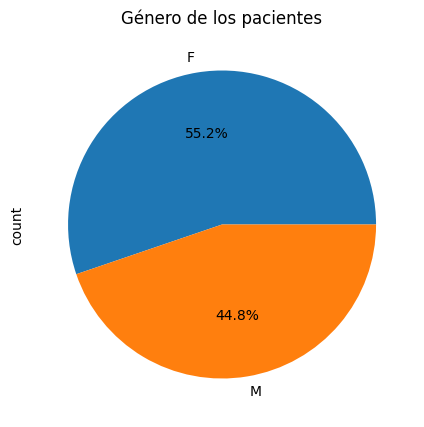

In [15]:
# Gráfica de SEXO con seaborn y matplotlib con colores con diagrama circular con porcentajes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
plt.title("Género de los pacientes")
df["SEXO"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

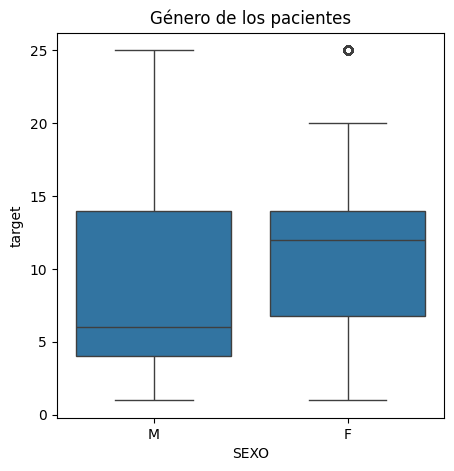

In [16]:
# Sexo vs target
plt.figure(figsize=(5, 5))
plt.title("Género de los pacientes")

sns.boxplot(x="SEXO", y="target", data=df)
plt.show()

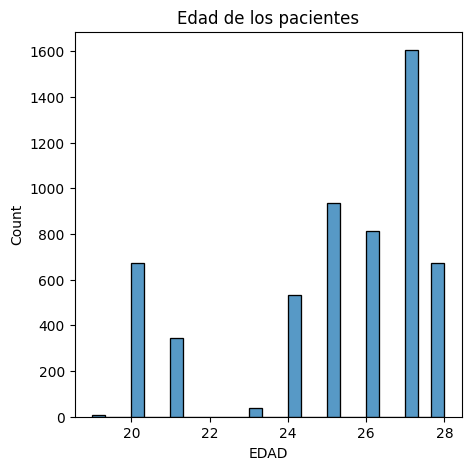

In [17]:
# Histgrama de edad con curva de densidad
plt.figure(figsize=(5, 5))
plt.title("Edad de los pacientes")
sns.histplot(df["EDAD"])
plt.show()

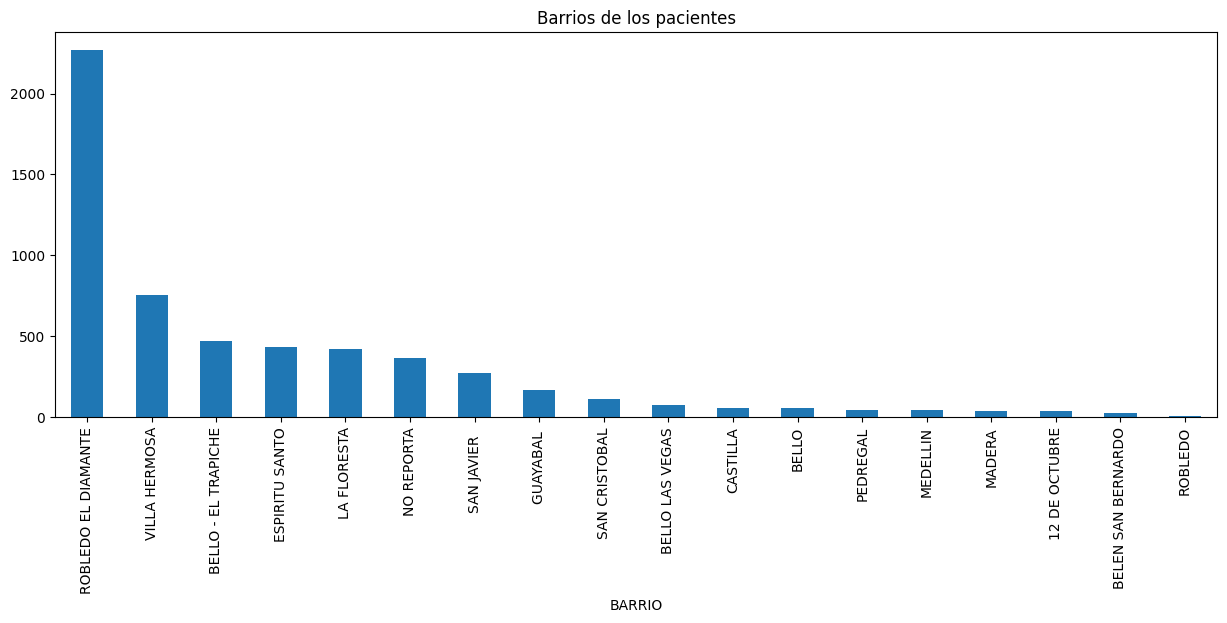

In [18]:
# Grafico de barras de los barrios
plt.figure(figsize=(15, 5))
plt.title("Barrios de los pacientes")
df["BARRIO"].value_counts().plot.bar()
plt.show()

### Correlacion

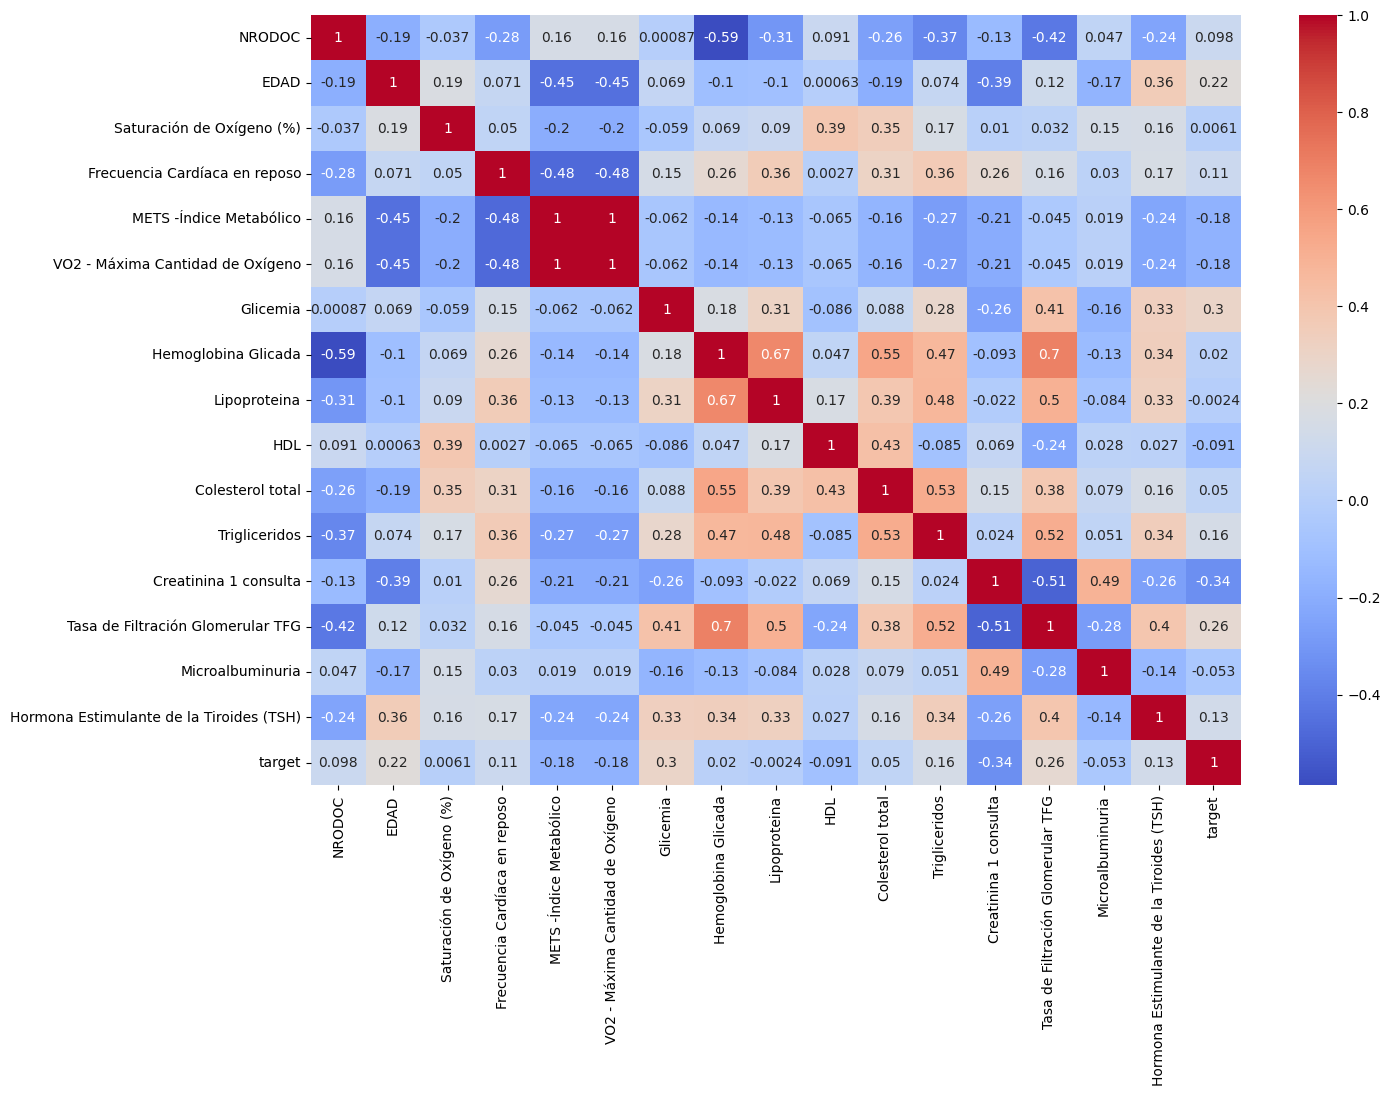

In [19]:
# Matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

MAYORES A 0.3
* Glicemia
* Creatinina

### Glicemia

* Tasa de filtracion glomerular (0.41)
* Hormona Estimulante de la Tiroides (0.33)
* Lipoproteina (0.31)
* Trigliceridos (0.28)
* Creatinina (-0.26)

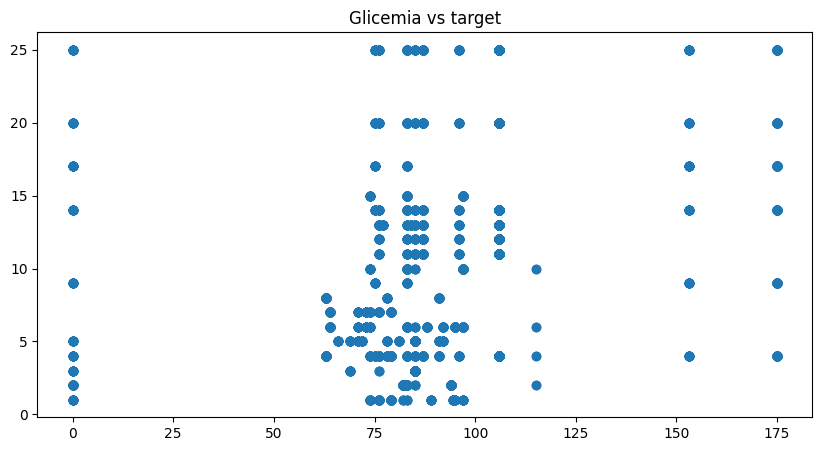

In [20]:
# Glicemia vs target diagrama de dispersión
plt.figure(figsize=(10, 5))
plt.title("Glicemia vs target")
plt.scatter(df["Glicemia"], df["target"])
plt.show()

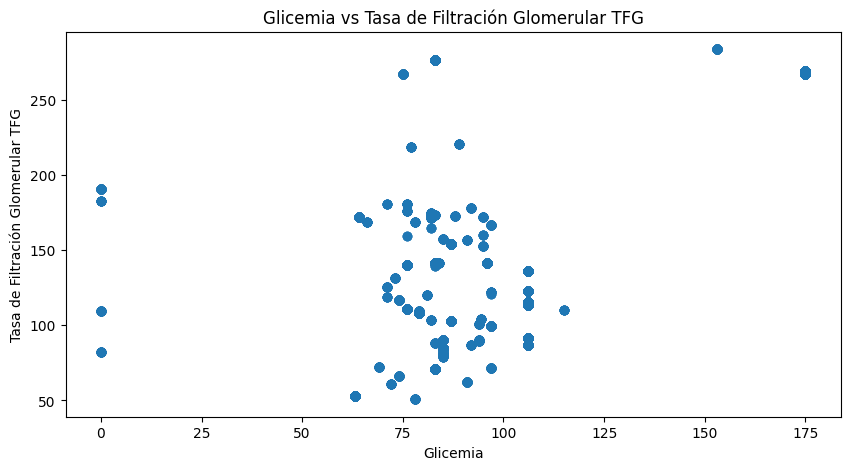

In [21]:
# Glicemia vs Tasa de Filtración Glomerular TFG1 con etiquetas en ejes
plt.figure(figsize=(10, 5))
plt.title("Glicemia vs Tasa de Filtración Glomerular TFG")
plt.xlabel("Glicemia")
plt.ylabel("Tasa de Filtración Glomerular TFG")
plt.scatter(df["Glicemia"], df["Tasa de Filtración Glomerular TFG"])
plt.show()

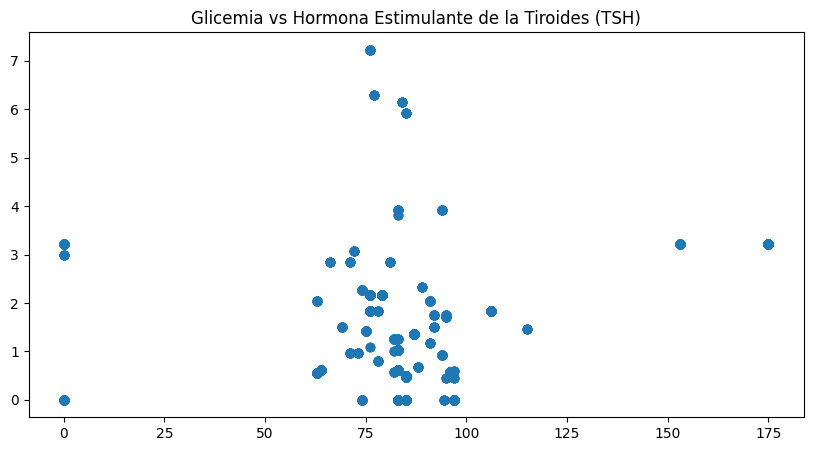

In [22]:
# Glicemia vs Hormona Estimulante de la Tiroides (TSH) diagrama de dispersión
plt.figure(figsize=(10, 5))
plt.title("Glicemia vs Hormona Estimulante de la Tiroides (TSH)")
plt.scatter(df["Glicemia"], df["Hormona Estimulante de la Tiroides (TSH)"])
plt.show()

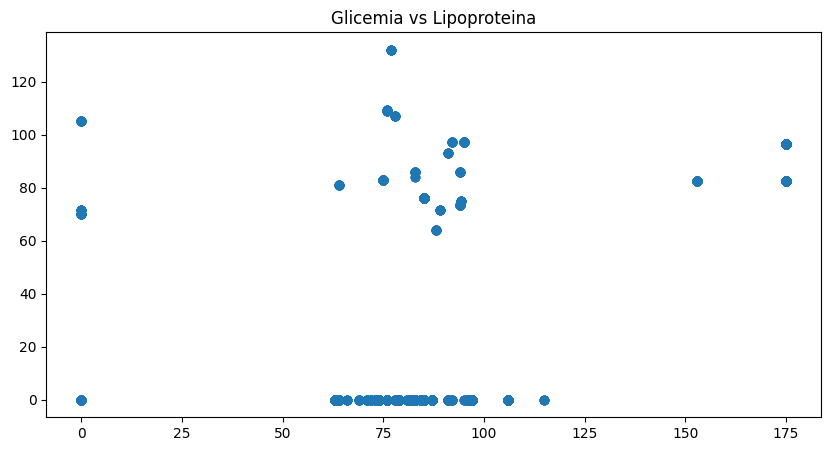

In [23]:
# Glicemia vs Lipoproteina
plt.figure(figsize=(10, 5))
plt.title("Glicemia vs Lipoproteina")
plt.scatter(df["Glicemia"], df["Lipoproteina"])
plt.show()

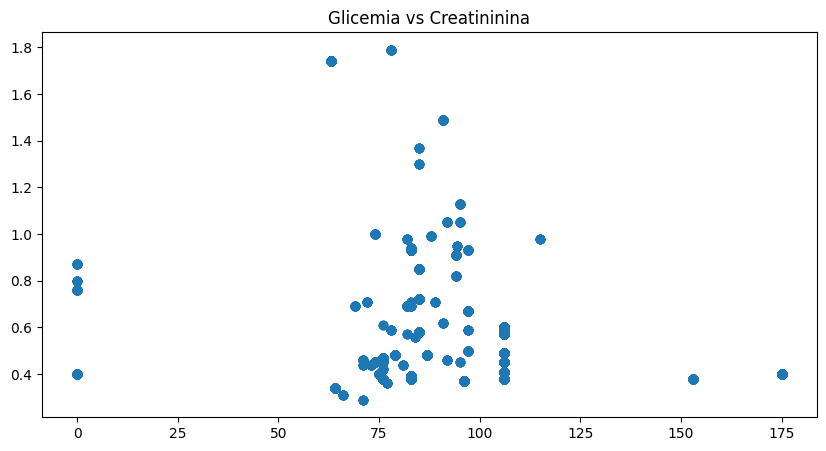

In [24]:
# Glicemia vs Creatininina 1
plt.figure(figsize=(10, 5))
plt.title("Glicemia vs Creatininina")
plt.scatter(df["Glicemia"], df["Creatinina 1 consulta"])
plt.show()

### Creatinina

<Axes: xlabel='Creatinina 1 consulta', ylabel='target'>

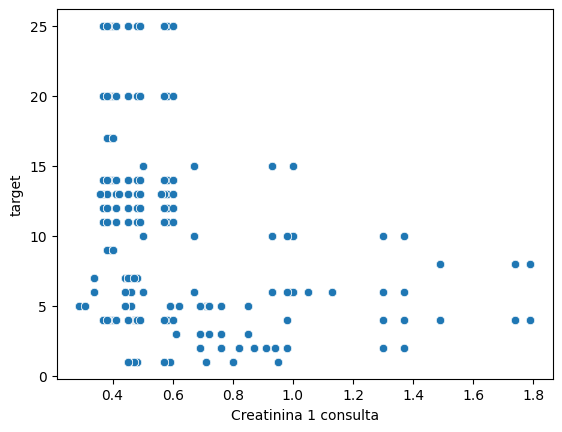

In [25]:
# Grafica de target vs creatina1
import seaborn as sns

sns.scatterplot(data=df, x="Creatinina 1 consulta", y="target")

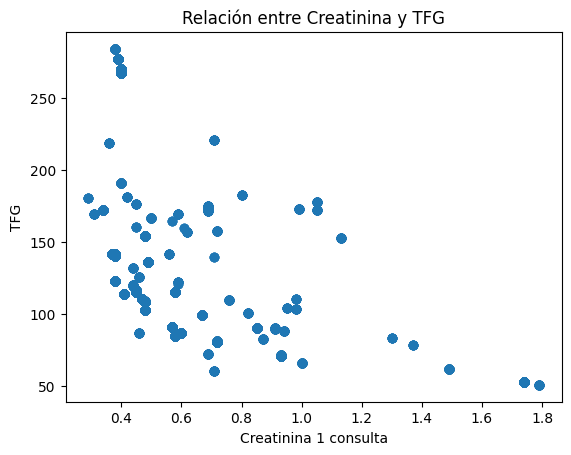

In [26]:
plt.scatter(df["Creatinina 1 consulta"], df["Tasa de Filtración Glomerular TFG"])
plt.xlabel("Creatinina 1 consulta")
plt.ylabel("TFG")
plt.title("Relación entre Creatinina y TFG")
plt.show()

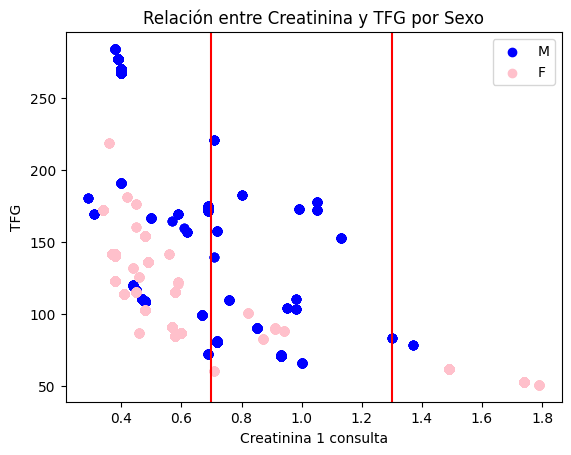

In [27]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión con colores diferentes para cada sexo
plt.scatter(
    df[df["SEXO"] == "M"]["Creatinina 1 consulta"],
    df[df["SEXO"] == "M"]["Tasa de Filtración Glomerular TFG"],
    color="blue",
    label="M",
)
plt.scatter(
    df[df["SEXO"] == "F"]["Creatinina 1 consulta"],
    df[df["SEXO"] == "F"]["Tasa de Filtración Glomerular TFG"],
    color="pink",
    label="F",
)

# Etiquetas de los ejes y título del gráfico
plt.xlabel("Creatinina 1 consulta")
plt.ylabel("TFG")
plt.title("Relación entre Creatinina y TFG por Sexo")

# poner una línea en el eje X = 0.7 y en X = 1.3
plt.axvline(x=0.7, color="red")
plt.axvline(x=1.3, color="red")


# Mostrar leyenda para distinguir entre hombres y mujeres
plt.legend()

# Mostrar el gráfico
plt.show()

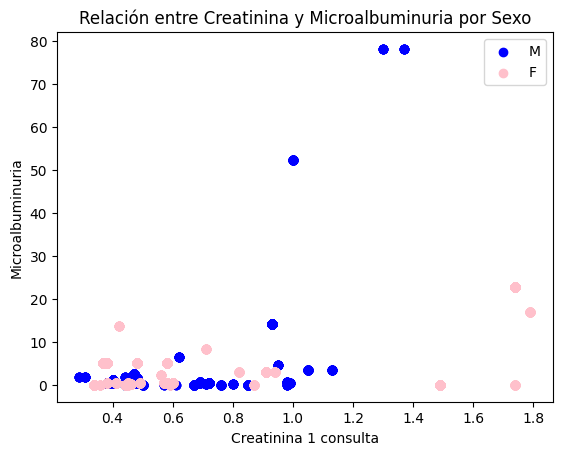

In [28]:
# Relación entre la creatinina 1 consulta y la microalbuminuria, separar por sexo
# Crear un gráfico de dispersión con colores diferentes para cada sexo

plt.scatter(
    df[df["SEXO"] == "M"]["Creatinina 1 consulta"],
    df[df["SEXO"] == "M"]["Microalbuminuria"],
    color="blue",
    label="M",
)
plt.scatter(
    df[df["SEXO"] == "F"]["Creatinina 1 consulta"],
    df[df["SEXO"] == "F"]["Microalbuminuria"],
    color="pink",
    label="F",
)

# Etiquetas de los ejes y título del gráfico
plt.xlabel("Creatinina 1 consulta")
plt.ylabel("Microalbuminuria")
plt.title("Relación entre Creatinina y Microalbuminuria por Sexo")

# Mostrar leyenda para distinguir entre hombres y mujeres
plt.legend()

Del gráfico actual, podemos observar que los jóvenes en su mayoría, tienen un funcionamiento renal bueno porque se puede evidenciar que entre más presencia de TGF hay, menor es la cantidad de Creatinina en el cuerpo, lo que quiere decir que los riñones de estos pacientes son eficientes a la hora de eliminar desechos del cuerpo humano.

### BOXPLOTS

In [29]:
# Quitar las siguientes columnas (despues de analizar los boxplots de estas variables se eliminan las siguientes)
df = df.drop(
    [
        "PRIMERA CLASE FUNCIONAL",
        "ÚLTIMA CLASE FUNCIONAL",
        "Test Findrisc",
        "Enfermedad Coronaria (En el último año)",
        "Insuficiencia Cardíaca",
        "Sufre de alguna enfermedad cardiovascular",
        "Tabaquismo",
        "Basciloscopia",
        "Úlcera de pie diabético",
        "Tiene próximo control",
        "TIPO EGRESO",
        "TIPO DIAGNOSTICO PRINCIPAL",
    ],
    axis=1,
)

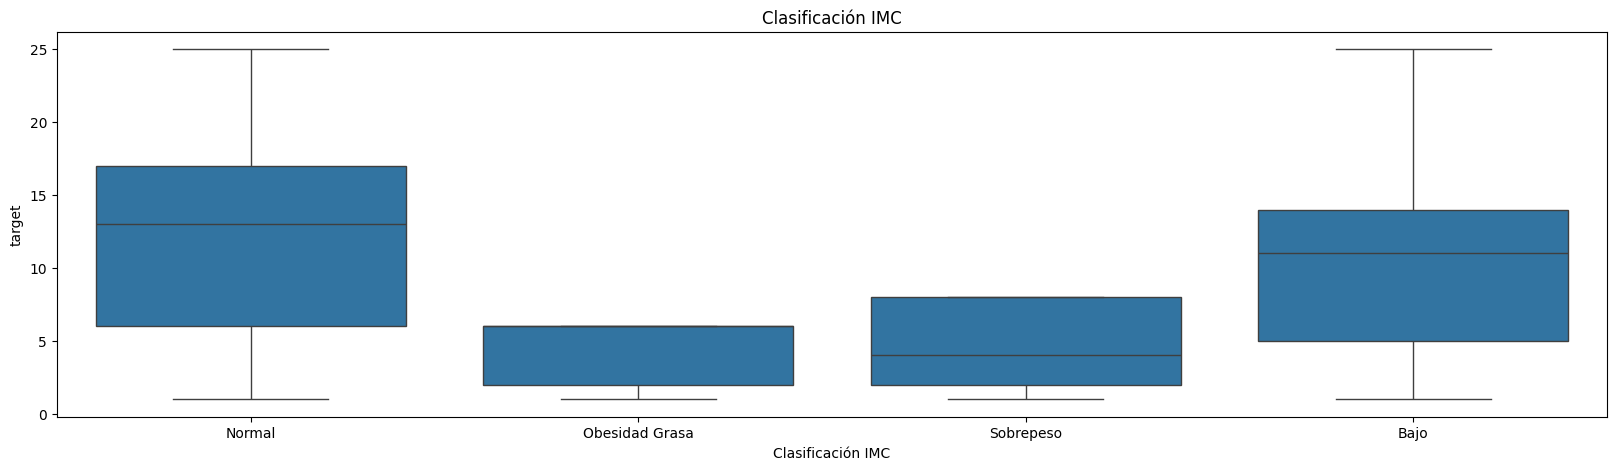

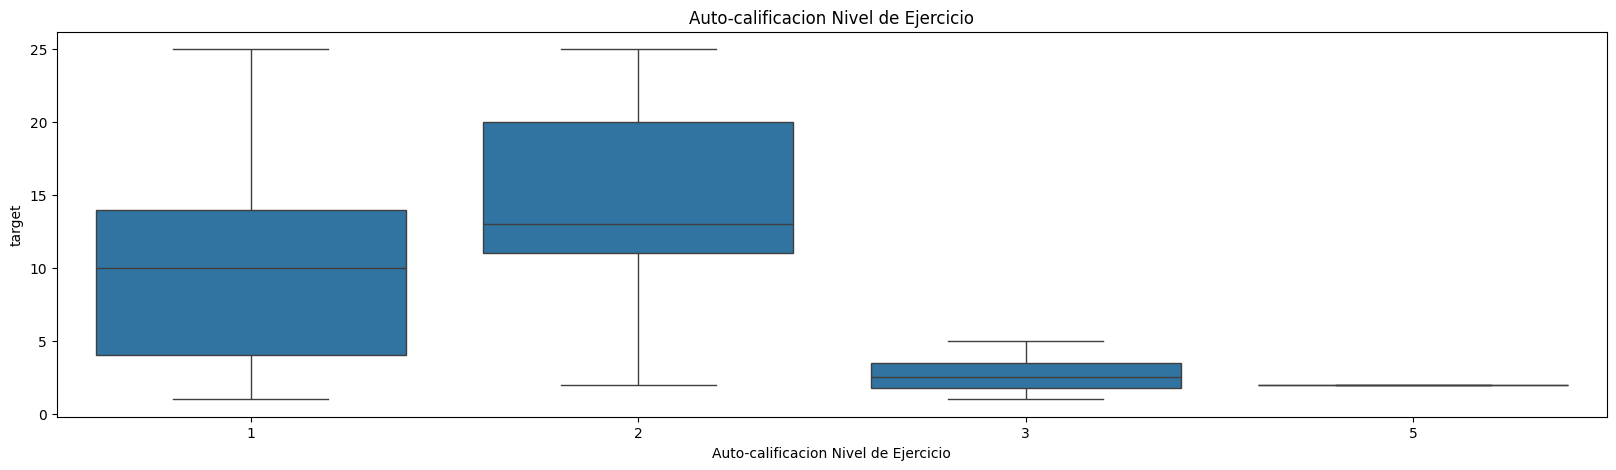

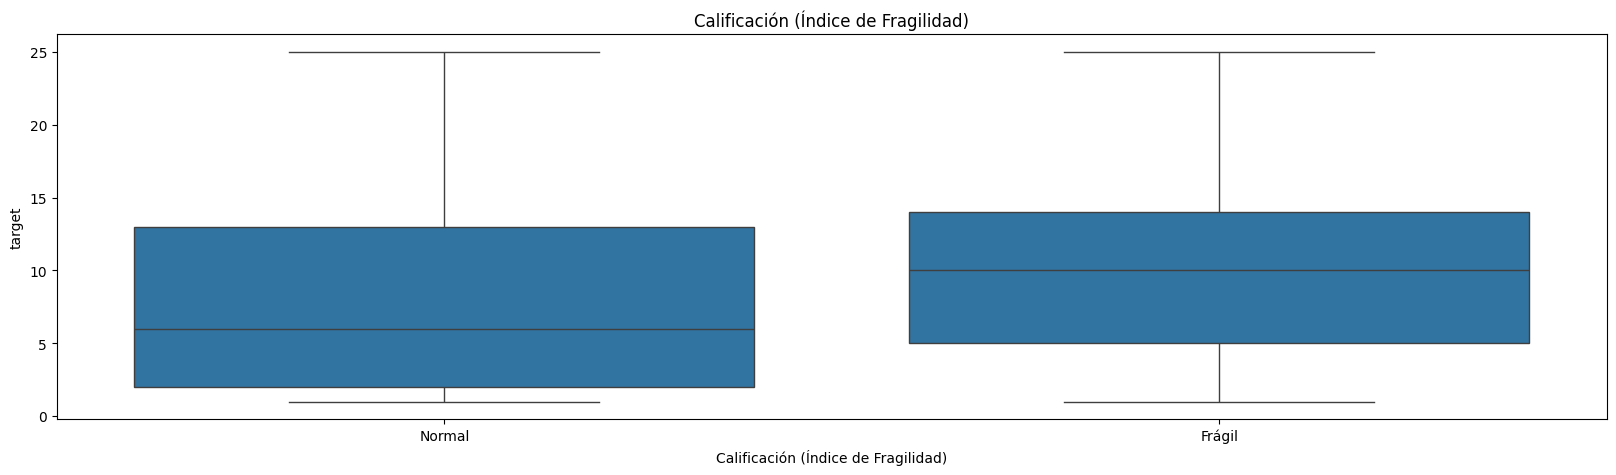

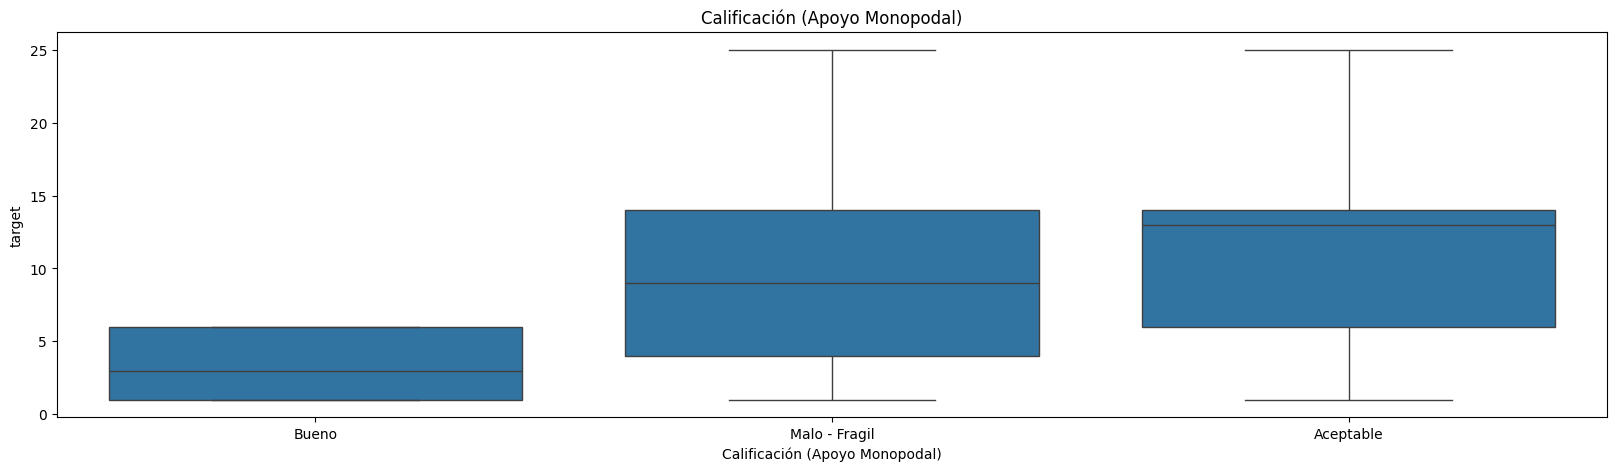

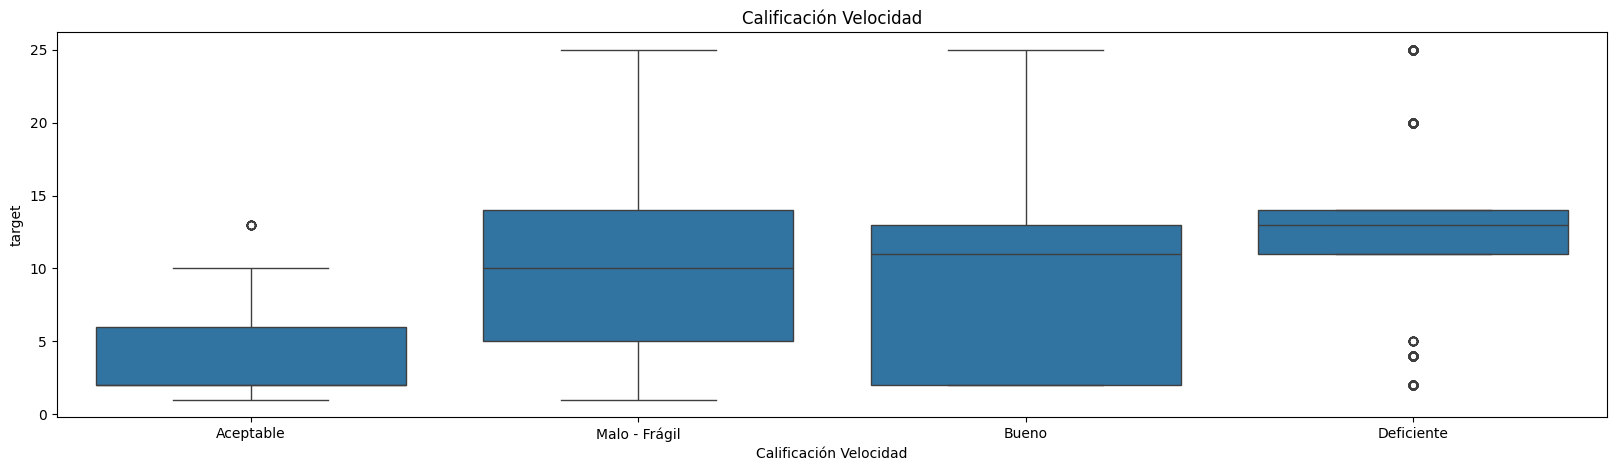

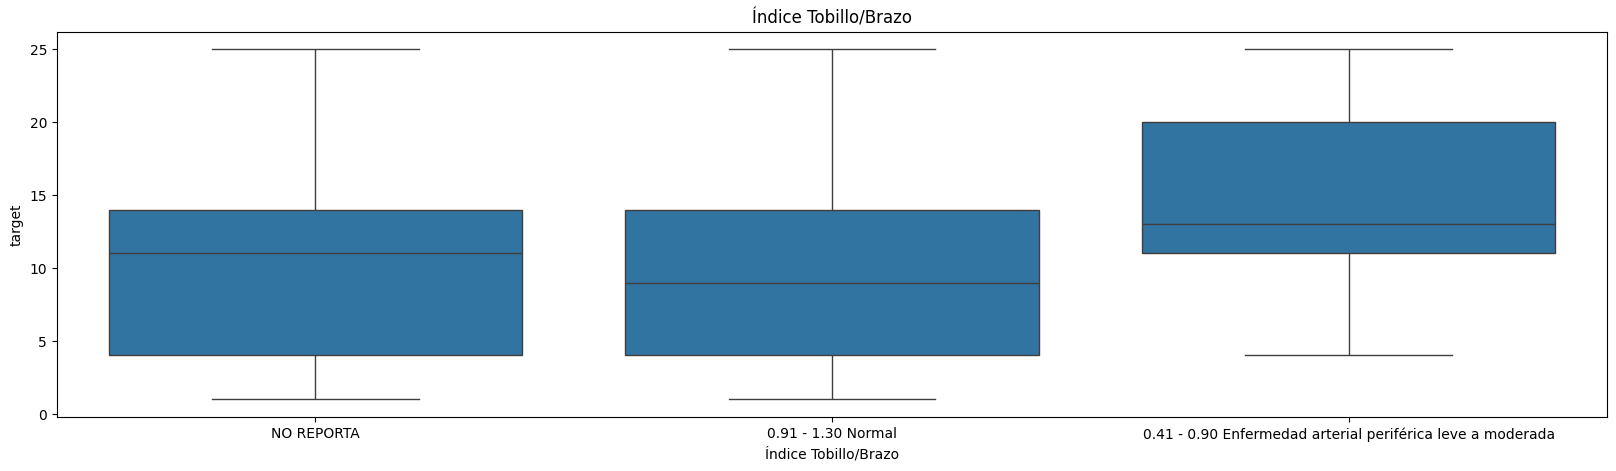

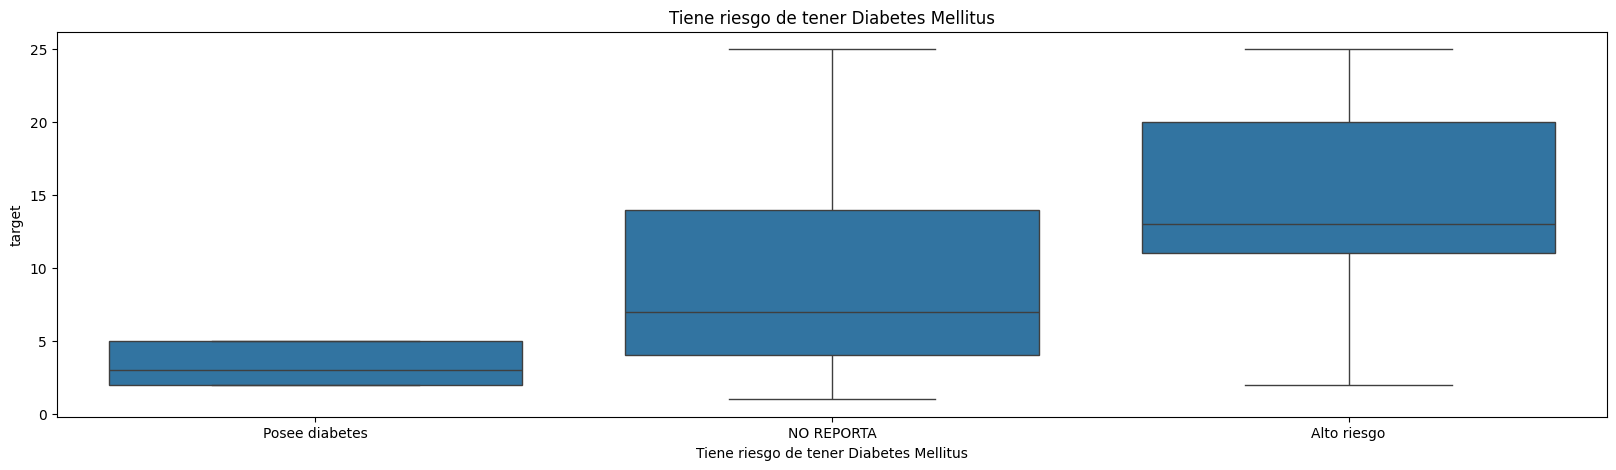

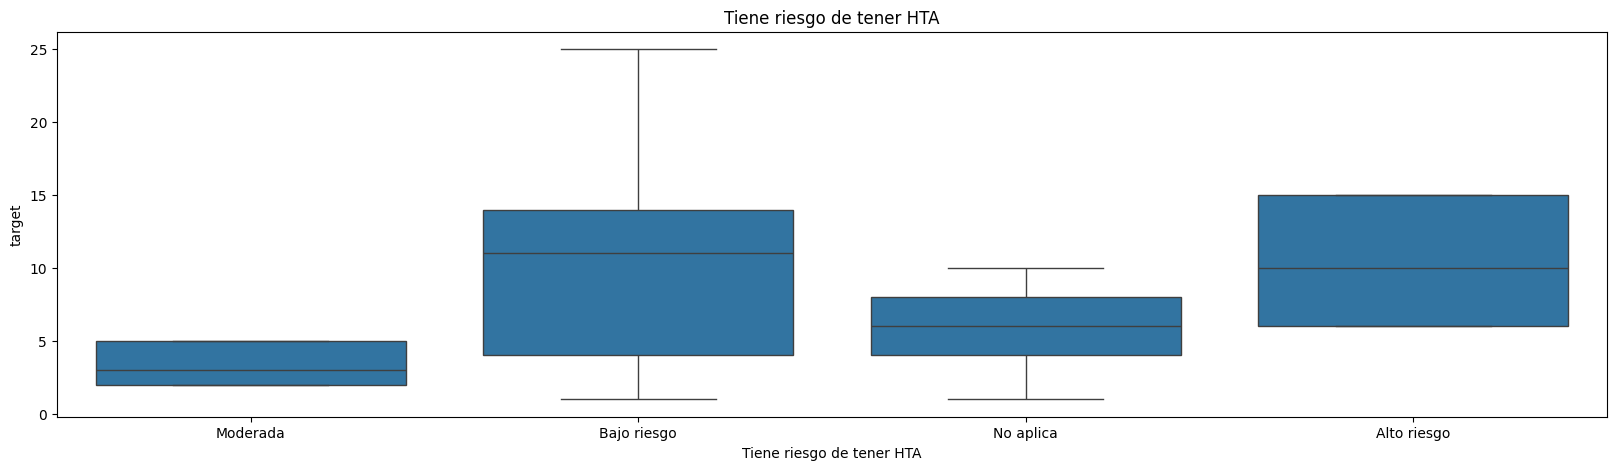

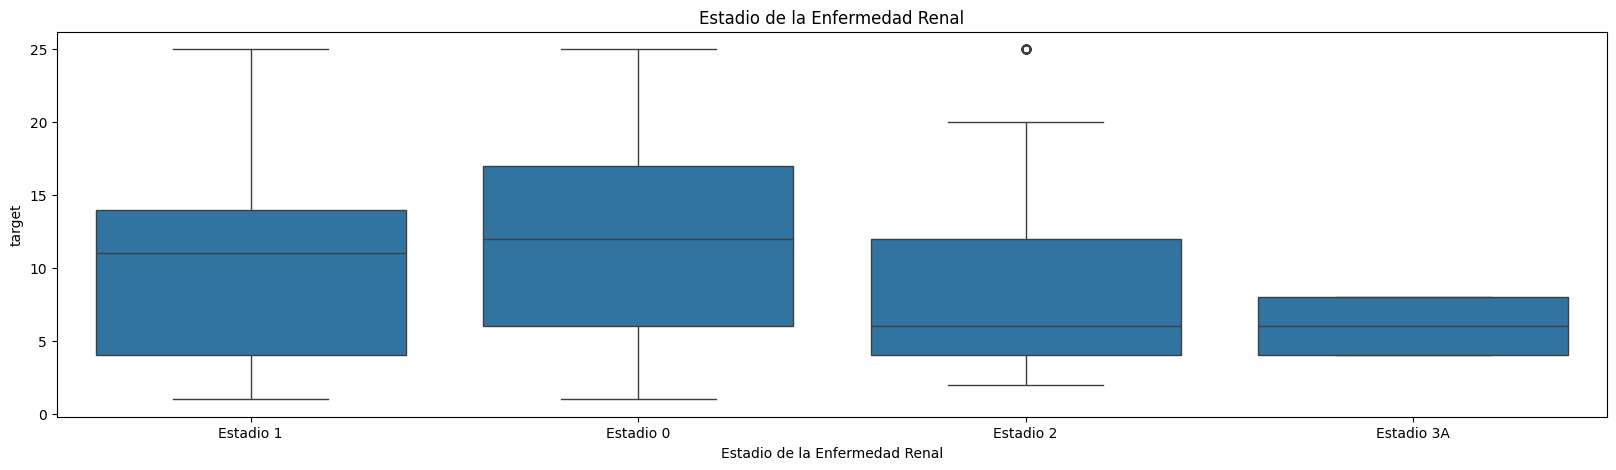

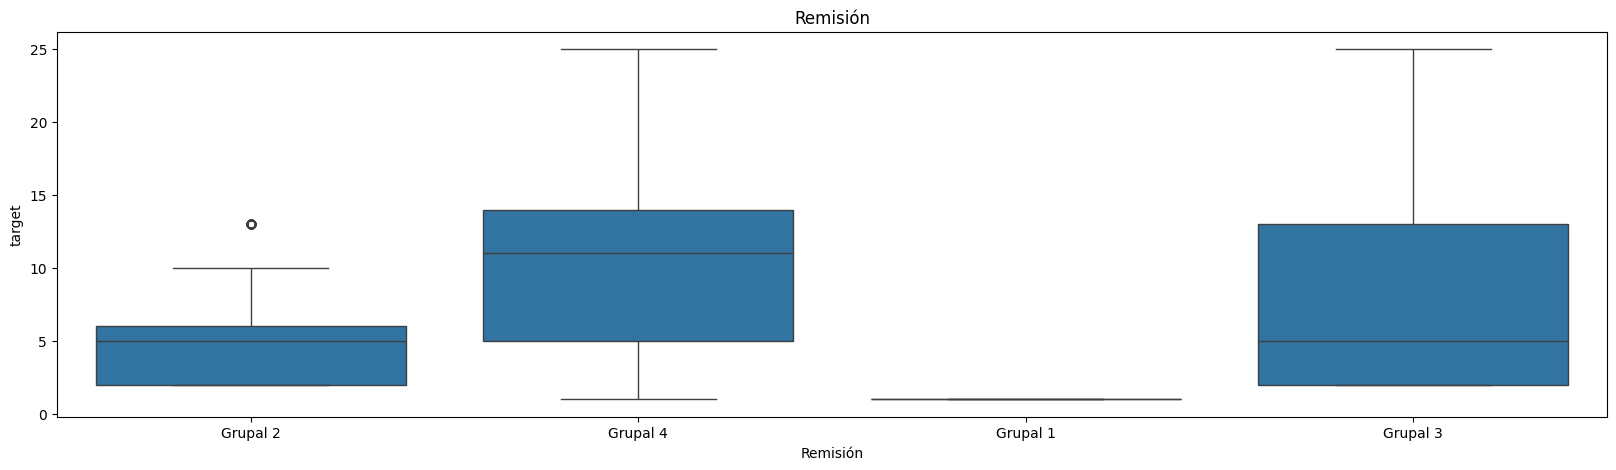

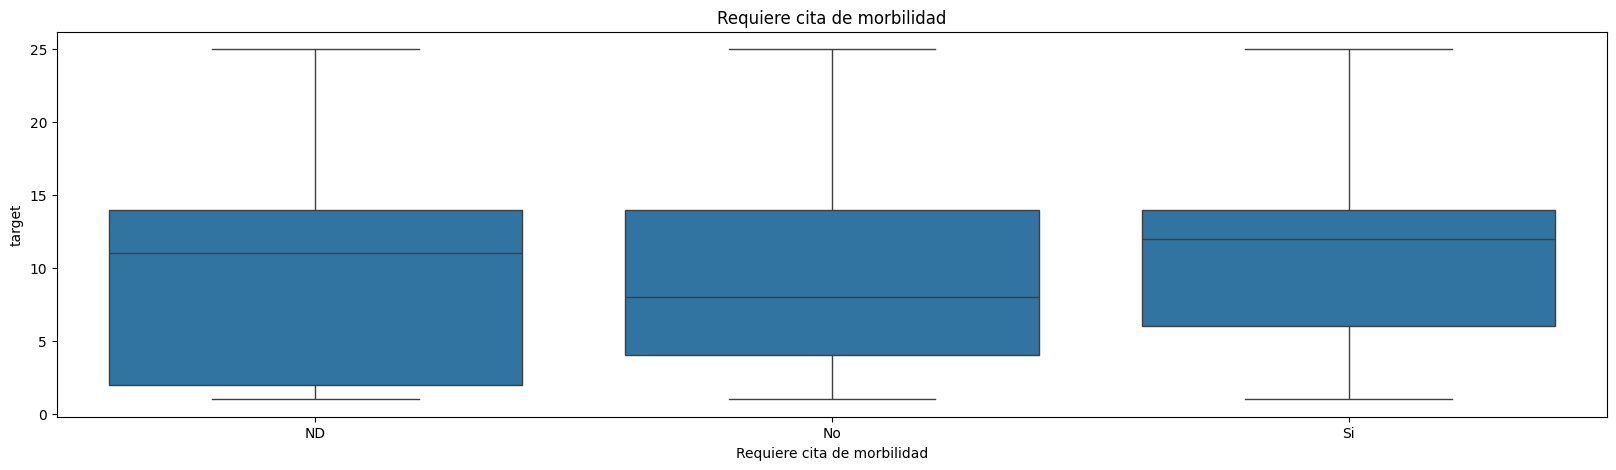

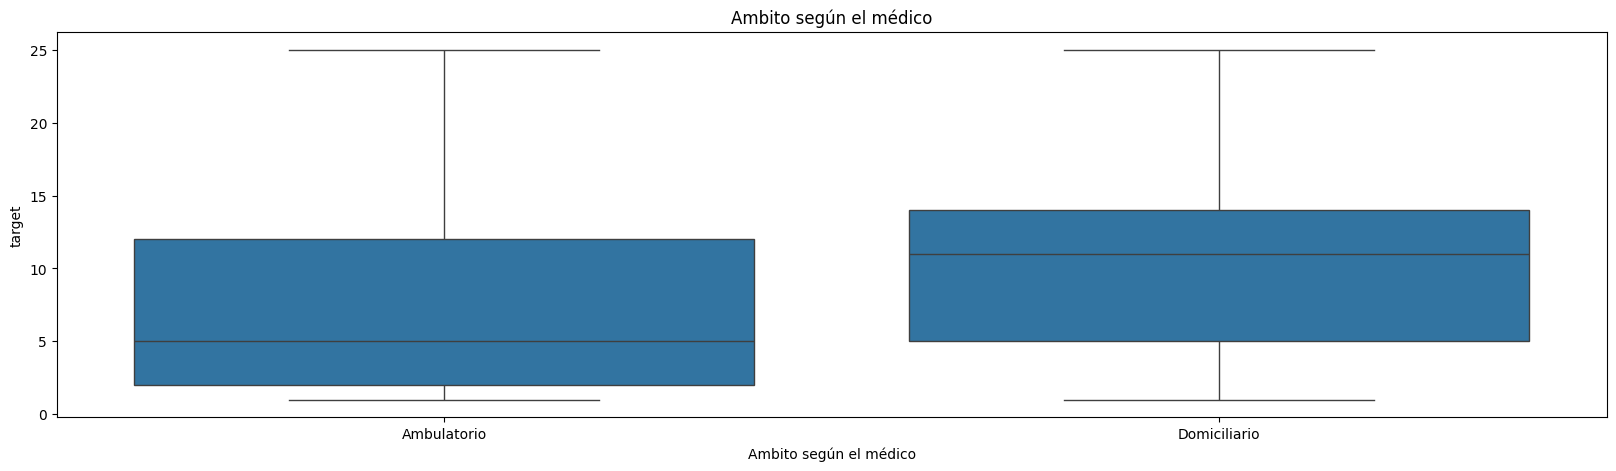

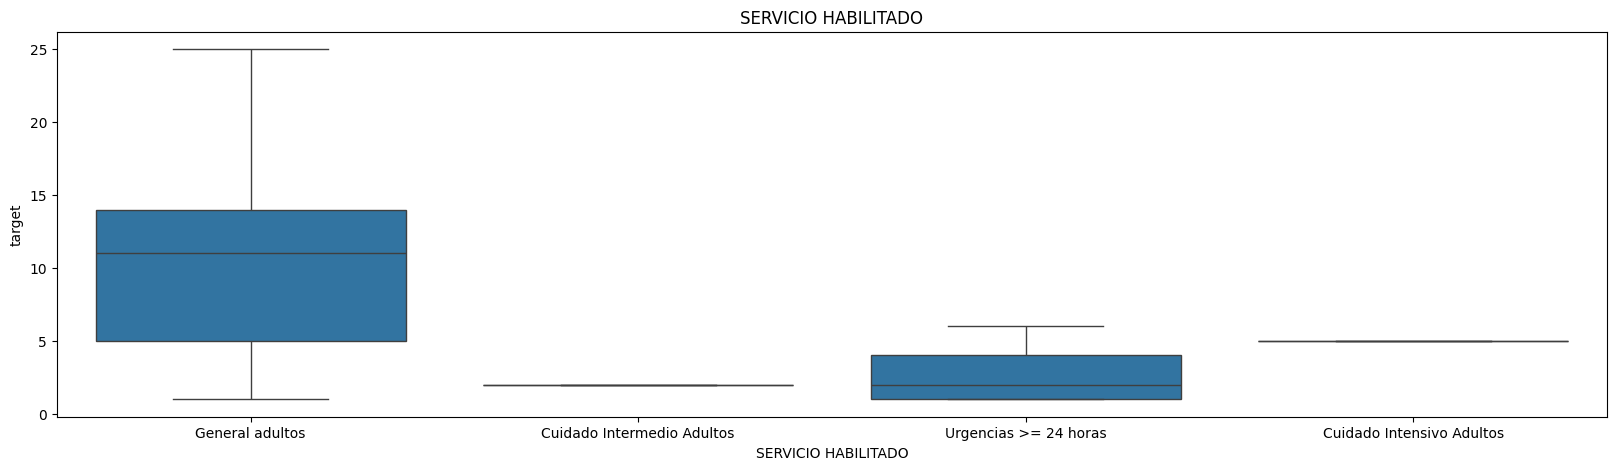

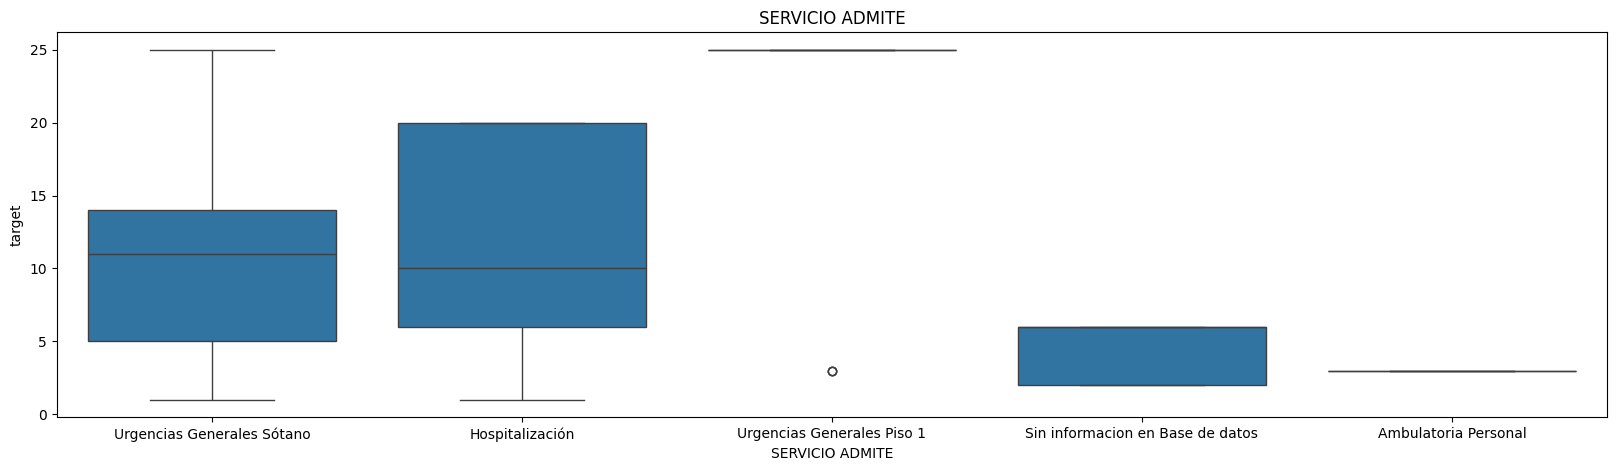

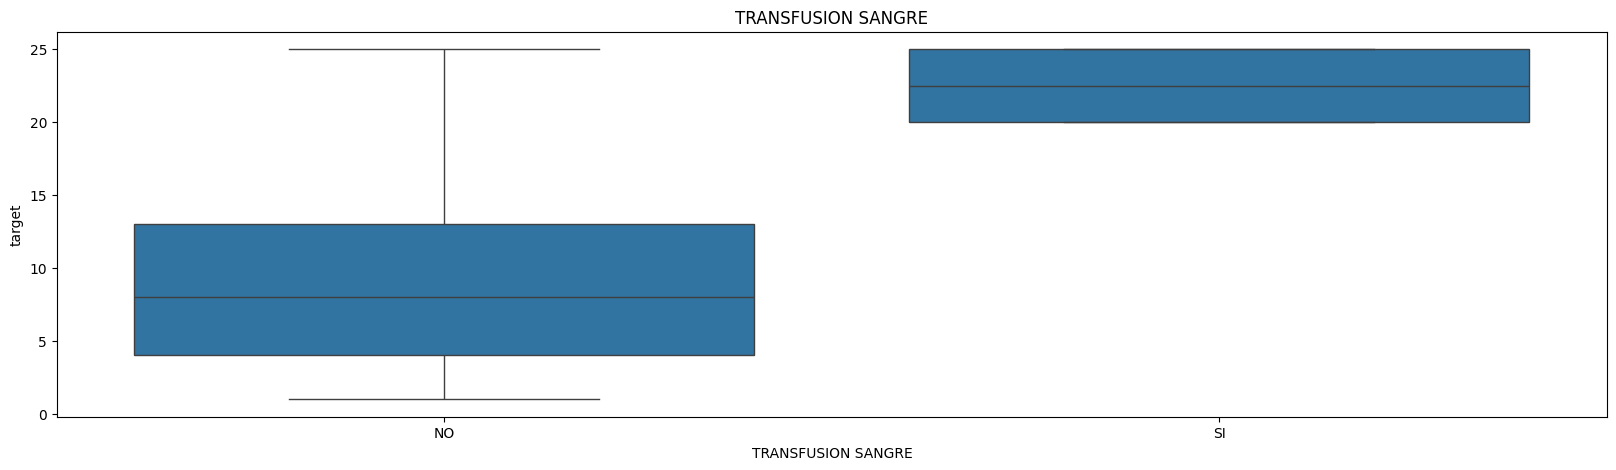

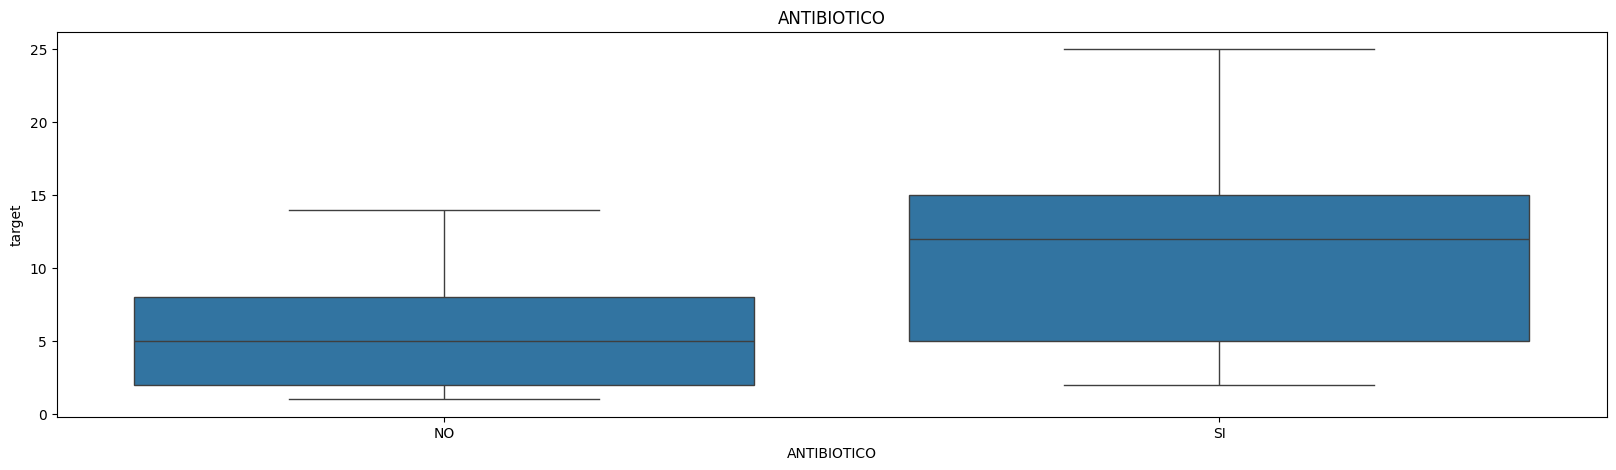

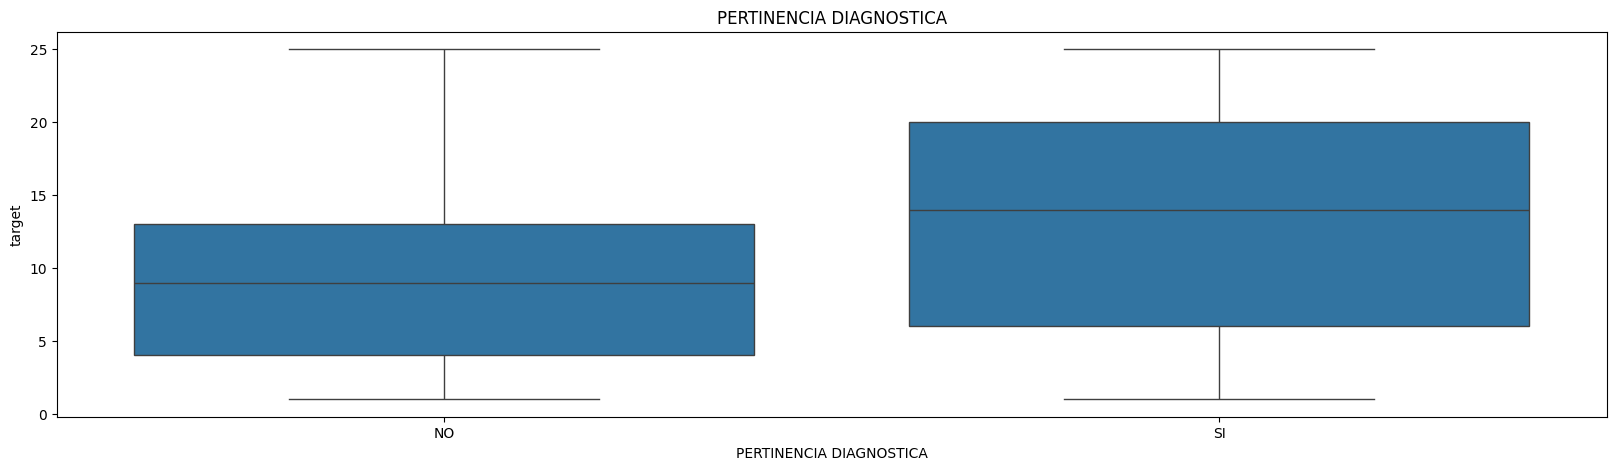

In [30]:
# columnas a borrar para el boxplot porque muestran información no relevante y complejizan el gráfico
lista = [
    "SEXO",
    "BARRIO",
    "Presión arterial registro medico",
    "Diagnóstico Principal",
    "NombreDiagnostico2",
    "NombreDiagnostico3",
    "NombreDiagnostico4",
    "DXPRINCIPAL EGRESO",
    "DX RELACIONADO1",
    "DX RELACIONADO2",
    "DX RELACIONADO3",
    "DX PRINCIPAL EGRESO CATEGORIA",
    "DX PRINCIPAL EGRESO CAPITULO",
    "PROFESIONAL ESPECIALIDAD GRD",
]


# For con boxplot con las variables categóricas con color pero quitando tomando los de tipo objeto y quitando los de la lista
for col in df.select_dtypes(include="object").drop(lista, axis=1).columns:
    plt.figure(figsize=(20, 5))
    plt.title(col)
    sns.boxplot(x=col, y="target", data=df)
    plt.show()

### Tabla de diagnósticos vs dias

In [32]:
## Tabla de los diagnósticos principales, relacionados y la estancia promedio
df.groupby(
    [
        "DXPRINCIPAL EGRESO",
        "DX RELACIONADO1",
        "DX RELACIONADO2",
        "DX RELACIONADO3",
    ]
)["target"].mean().sort_values(ascending=False).head(5).to_frame()

,,,,target
DXPRINCIPAL EGRESO,DX RELACIONADO1,DX RELACIONADO2,DX RELACIONADO3,
COVID-19 VIRUS IDENTIFICADO,NEUMONIA DEBIDA A OTROS VIRUS,INFECCION AGUDA NO ESPECIFICADA DE LAS VIAS RESPIRATORIAS INFERIORES,INSUFICIENCIA RESPIRATORIA AGUDA,25.0
ENDOCARDITIS INFECCIOSA AGUDA Y SUBAGUDA,OTROS AGENTES BACTERIANOS ESPECIFICADOS COMO CAUSA DE ENFERMEDADES CLASIFICADAS EN OTROS CAPITULOS,NEUMONIA LOBAR NO ESPECIFICADA,INSUFICIENCIA RESPIRATORIA AGUDA,25.0
OTRAS NEUMONIAS BACTERIANAS,OTRAS EPILEPSIAS Y SINDROMES EPILEPTICOS GENERALIZADOS,OTROS HIPOTIROIDISMOS ESPECIFICADOS,HEMORROIDES SIN OTRA ESPECIFICACION,20.0
INFECCION Y REACCION INFLAMATORIA DEBIDAS A OTROS DISPOSITIVOS PROTESICOS IMPLANTES E INJERTOS INTERNOS,OPERACION QUIRURGICA CON IMPLANTE DE UN DISPOSITIVO ARTIFICIAL INTERNO,SEPTICEMIA DEBIDA A OTROS ORGANISMOS GRAMNEGATIVOS,INSUFICIENCIA TRICUSPIDE,20.0
FUNCIONAMIENTO DEFECTUOSO DE LA TRAQUEOSTOMIA,NEUMONITIS DEBIDA A ASPIRACION DE ALIMENTO O VOMITO,TRAQUEITIS AGUDA,OTROS AGENTES BACTERIANOS ESPECIFICADOS COMO CAUSA DE ENFERMEDADES CLASIFICADAS EN OTROS CAPITULOS,17.0


### Quitar más columnas

In [33]:
# Quitar las siguientes columnas (despues de analizar los boxplots se eliminan las siguientes)
# Estas columnas fueron utiles para el analisis exploratorio pero no para el modelado
df = df.drop(
    [
        "NRODOC",
        "BARRIO",
        "Remisión",
        "FECHA INGRESO CLINICA",
        "FECHA SALIDA",
        "DXPRINCIPAL EGRESO",
        "DX RELACIONADO1",
        "DX RELACIONADO2",
        "DX RELACIONADO3",
        "Diagnóstico Principal",
        "NombreDiagnostico2",
        "NombreDiagnostico3",
        "NombreDiagnostico4",
        "Presión arterial registro medico",
        "DX PRINCIPAL EGRESO CATEGORIA",
        "DX PRINCIPAL EGRESO CAPITULO",
    ],
    axis=1,
)

QUITAR
* NRODOC
* Remisión: No hay información en diccionario
* FECHA INGRESO CLINICA
* FECHA SALIDA
----Información en DX PRINCIPAL EGRESO CATEGORIA y CAPITULO----------
* DXPRINCIPAL EGRESO
* DX RELACIONADO1
* DX RELACIONADO2
* DX RELACIONADO3
* Diagnóstico Principal
* NombreDiagnostico2
* NombreDiagnostico3
* NombreDiagnostico4
* Presión arterial registro medico

## Preprocesamiento

In [472]:
from sklearn.model_selection import train_test_split

# Separación de caracteristicas y target (X , y)
y = df.target
X = df.drop(["target"], axis=1)

# Separación en conjuntos de train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Mostrar los tamaños de los conjuntos
print("Tamaño de X_train: ", X_train.shape)
print("Tamaño de X_test: ", X_test.shape)

Tamaño de X_train:  (4496, 33)
Tamaño de X_test:  (1124, 33)


In [473]:
# Seleccionar variables numéricas int64 y float64 y categóricas object
numeric_columns = list(X.select_dtypes(include=["int64", "float64"]).columns)
categorical_columns = list(X.select_dtypes("object").columns)

# Transformación logarítmica de las variables numéricas
# suma 1 para evitar el log(0)
X_train[numeric_columns] = np.log(X_train[numeric_columns] + 1)
X_test[numeric_columns] = np.log(X_test[numeric_columns] + 1)

# Transformacion box-cox de las variables numéricas
# from scipy.stats import boxcox

# for col in numeric_columns:
#    X_train[col], _ = boxcox(X_train[col] + 1)
#    X_test[col], _ = boxcox(X_test[col] + 1)


# Convertir a dummy las variables categóricas
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

Utilizamos las variables sin transformar y al revisar el modelo Ridge, se observa que no posee una normalidad muy alta por lo que se decide aplicar una transformación logaritmica a las variables que no poseen una normalidad muy alta y se observa que el modelo mejora, también se aplica una transformación Box-Cox para seguir mejorando la normalidad y vemos que la normalidad mejora pero el RSME sube a 11, lo cual es bastante elevado, por lo que se decide no aplicar la transformación Box-Cox y se deja la transformación logaritmica.

## Modelos

En este contexto médico, es importante tener en cuenta la posibilidad de valores extremos. Estos valores extremos pueden ser causados por una variedad de factores, como pacientes con condiciones médicas graves o complejas.

En este contexto, los valores extremos son lógicos, ya que se debe a pacientes que tienen gravedad en su enfermedad y que no son enfermedades comunes. Por lo tanto, es importante utilizar una métrica que sea sensible a estos valores extremos.

El RMSE es una métrica que es más sensible a los valores extremos que el MSE. Esto significa que un modelo con un RMSE bajo es más probable que haga predicciones precisas, incluso si hay valores extremos en los datos.

Por lo tanto, en este contexto, el RMSE es una mejor métrica para evaluar el rendimiento del modelo de predicción de la estancia hospitalaria.

In [474]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import BayesianRidge

from sklearn.model_selection import cross_validate


################################## MODELOS ########################################
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "BayesianRidge": BayesianRidge(),
}

##############################ENTRENAR MODELOS CON CV Y MÉTRICA################################################################
# Cargar librerías
from sklearn.model_selection import cross_validate  # Validación cruzada


def train_models_cv(models, X_train, y_train, cv, metrics):
    results = []

    for model_name, model in models.items():
        model_results = {"Model": model_name}
        for metric_name, metric_func in metrics:
            cv_results = cross_validate(
                model,
                X_train,
                y_train,
                cv=cv,
                n_jobs=-1,
                scoring=metric_func,
                return_train_score=True,
            )
            train_mean = cv_results["train_score"].mean()
            test_mean = cv_results["test_score"].mean()
            model_results[f"{metric_name} (Train)"] = train_mean
            model_results[f"{metric_name} (Test)"] = test_mean
        results.append(model_results)

    results_df = pd.DataFrame(results)
    return results_df


# Fit en todos los modelos con for
for model_name, model in models.items():
    model.fit(X_train, y_train)


######################## MÉTRICAS ########################################
# Define las métricas como una lista de tuplas (nombre, función)
# En el CV la calcula como negativa neg_root_mean_squared_error
metrics = [
    ("RMSE", "neg_root_mean_squared_error"),
    # ("MSE", "neg_mean_squared_error"),
]

# Llama a la función con tus modelos, datos y validación cruzada
results_df = train_models_cv(models, X_train, y_train, cv=5, metrics=metrics)
print(results_df)

                   Model  RMSE (Train)  RMSE (Test)
0       LinearRegression     -1.987255    -2.054430
1  DecisionTreeRegressor     -0.082309    -0.098437
2                  Ridge     -2.001503    -2.054088
3                  Lasso     -5.874091    -5.881978
4          BayesianRidge     -1.979411    -2.041619


Un RMSE de 2.05 es un buen resultado para la predicción de la estancia hospitalaria. Esto significa que, en promedio, las predicciones del modelo están a 2.05 días de la estancia hospitalaria real.

Sin embargo, es importante tener en cuenta que el RMSE es una medida de la precisión del modelo, pero no de su exactitud. El RMSE puede ser bajo incluso si el modelo está sesgado.

## Hiperparametros

### RidgeRegressor

In [513]:
# Ajustar hiperparametros de Ridge con GridSearchCV y cross_validate
from sklearn.model_selection import GridSearchCV

# Definir el modelo
model = Ridge()


# Definir los hiperparámetros a probar
param_grid = {
    "alpha": [10, 50, 100],  # Un valor muy alto de alpha puede llevar a un underfitting
    "solver": [
        "auto",
        "svd",
        "cholesky",
        "lsqr",
        "sparse_cg",
        "sag",
        "saga",
    ],  # El solver saga no soporta penalty l1
    "max_iter": [1000, 5000, 10000],  # El valor por defecto es 1000
    "tol": [0.0001, 0.001, 0.01, 0.1],  # El valor por defecto es 0.001
}


# Definir la búsqueda
grid_search = GridSearchCV(
    model, param_grid, scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1
)

# Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros y su resultado
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 10, 'max_iter': 1000, 'solver': 'auto', 'tol': 0.0001}
-2.1934611609878636


In [515]:
from sklearn.metrics import mean_squared_error  # RMSE debe colocar squared=False

# Predicciones en el conjunto de test
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print(
    f"RMSE en test: {mean_squared_error(y_test, y_pred, squared=False):.3f} en un conjunto de {len(y_test)} observaciones"
)

RMSE en test: 2.233 en un conjunto de 1124 observaciones


#### Supuestos de los residuales (Modelos de regresión lineales)

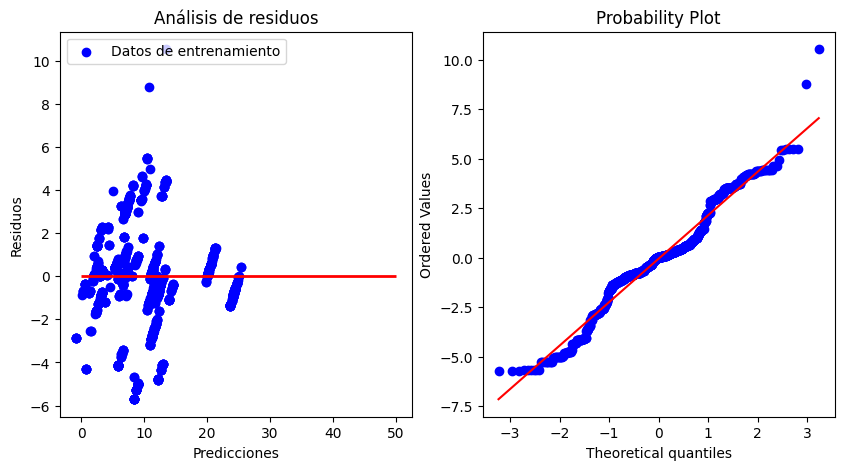

Test Shapiro (normalidad): 0.9637, p=0.00000000000000039841
-> No cumple con la normalidad (p < 0.05)
Test Kolmogorov-Smirnov (normalidad): 0.1533, p=0.00000000000000000000
-> No cumple con la normalidad (p < 0.05)
Test Jarque-Bera (normalidad): 25.1601, p=0.00000343992781605747
-> No cumple con la normalidad (p < 0.05)
------------------------------------------------------
Test Breusch-Pagan (Independencia): 824.6843, p=0.00000000000000000000
-> No cumple con la independencia (p < 0.05)
Test Levene (Homocedasticidad) =22.4701, p=0.0000
-> No cumple con la homocedasticidad (p < 0.05)


In [516]:
############################################# NORMALIDAD ###########################
# En una regresión lineal múltiple, es más probable que se viole el supuesto de normalidad que en
# una regresión lineal simple. Esto se debe a que hay más variables independientes que pueden afectar
# la distribución de los residuos


# Verificar la normalidad con QQ-plot y Analisis de residuos en 2 columnas y 1 fila
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Análisis de residuos")
plt.scatter(
    y_pred, y_pred - y_test, c="blue", marker="o", label="Datos de entrenamiento"
)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=0, xmax=50, lw=2, color="red")

plt.subplot(1, 2, 2)
plt.title("QQ-plot")

import scipy.stats as stats

stats.probplot(y_pred - y_test, dist="norm", plot=plt)
plt.show()

# Utilizando el valor p para verificar la normalidad
from scipy.stats import shapiro

stat, p = shapiro(y_pred - y_test)
print("Test Shapiro (normalidad): %.4f, p=%.20f" % (stat, p))  # p < 0.05 no es normal

# Crear print condicionado si p < 0.05 no cumplen con la normalidad
if p < 0.05:
    print("-> No cumple con la normalidad (p < 0.05)")
else:
    print("-> Cumple con la normalidad (p > 0.05)")

# Test de Kolmogorov-Smirnov
from scipy.stats import kstest

stat, p = kstest(y_pred - y_test, "norm")
print("Test Kolmogorov-Smirnov (normalidad): %.4f, p=%.20f" % (stat, p))

# Crear print condicionado si p < 0.05 no cumplen con la normalidad
if p < 0.05:
    print("-> No cumple con la normalidad (p < 0.05)")
else:
    print("-> Cumple con la normalidad (p > 0.05)")

# Test de Jarque-Bera
from scipy.stats import jarque_bera

stat, p = jarque_bera(y_pred - y_test)
print("Test Jarque-Bera (normalidad): %.4f, p=%.20f" % (stat, p))

# Crear print condicionado si p < 0.05 no cumplen con la normalidad
if p < 0.05:
    print("-> No cumple con la normalidad (p < 0.05)")
else:
    print("-> Cumple con la normalidad (p > 0.05)")

print("------------------------------------------------------")


############################################# INDEPENDENCIA ###########################
# En modelos no lineales multiples es comun que no se cumpla debido a la gran cantidad de variables


# Test de Breusch-Pagan
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Agrega una columna constante a X_test.copy
X_test_cons = sm.add_constant(X_test)

# Realiza la prueba de Breusch-Pagan
stat, p, f, fp = het_breuschpagan(y_pred - y_test, X_test_cons)

print("Test Breusch-Pagan (Independencia): %.4f, p=%.20f" % (stat, p))

# Crear print condicionado si p < 0.05 no cumplen
if p < 0.05:
    print("-> No cumple con la independencia (p < 0.05)")
else:
    print("-> Cumple con la independencia (p > 0.05)")


############################################# HOMOCEDASTICIDAD ###########################
# En modelos no lineales multiples es comun que no se cumpla debido a la gran cantidad de variables

# Test de Levene
from scipy.stats import levene

stat, p = levene(y_pred, y_test)
print(
    "Test Levene (Homocedasticidad) =%.4f, p=%.4f" % (stat, p)
)  # p < 0.05 no es homocedastico
if p < 0.05:
    print("-> No cumple con la homocedasticidad (p < 0.05)")
else:
    print("-> Cumple con la homocedasticidad (p > 0.05)")

### DecisionTreeRegressor

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
-0.09535923226908213


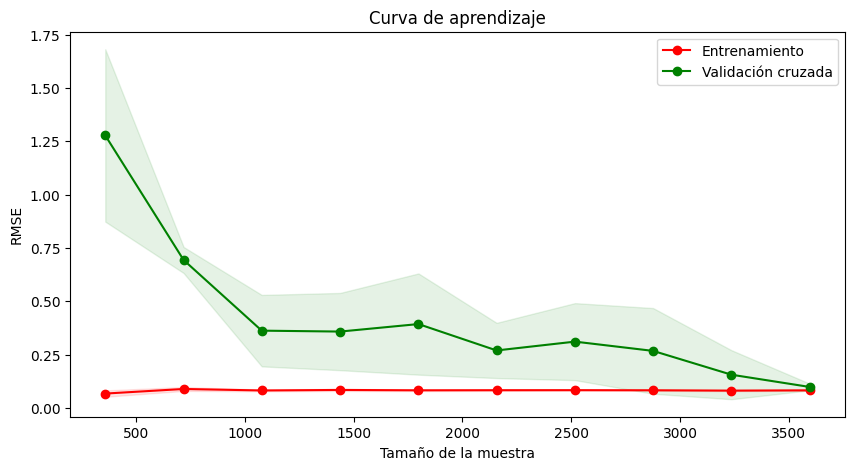

In [517]:
# Ajustar hiperparametros con GridSearchCV y cross_validate
from sklearn.model_selection import GridSearchCV

# Definir el modelo
model = DecisionTreeRegressor()

# Definir los hiperparámetros a probar

param_grid = {
    "max_depth": [5, 10, 15, 20, 50],
    "min_samples_split": [2, 5, 10, 15],
    "min_samples_leaf": [1, 2, 5, 10],
}

# Definir la búsqueda
grid_search = GridSearchCV(
    model, param_grid, scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1
)

# Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros y su resultado
print(grid_search.best_params_)
print(grid_search.best_score_)

###################################### Curva de aprendizaje ######################################

# Definir el modelo con los mejores hiperparámetros
model = grid_search.best_estimator_

# Definir los tamaños de entrenamiento
train_sizes = np.linspace(0.1, 1.0, 10)

# Calcular los scores de entrenamiento y validación tomados de GridSearchCV
train_sizes, train_scores, validation_scores = learning_curve(
    model,
    X_train,
    y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring="neg_root_mean_squared_error",
)

# Calcular la media y la desviación estándar de los scores de entrenamiento y validación
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)
validation_scores_std = validation_scores.std(axis=1)

# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.title("Curva de aprendizaje")
plt.xlabel("Tamaño de la muestra")
plt.ylabel("RMSE")
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    validation_scores_mean - validation_scores_std,
    validation_scores_mean + validation_scores_std,
    alpha=0.1,
    color="g",
)

plt.plot(
    train_sizes,
    train_scores_mean,
    "o-",
    color="r",
    label="Entrenamiento",
)
plt.plot(
    train_sizes,
    validation_scores_mean,
    "o-",
    color="g",
    label="Validación cruzada",
)

plt.legend(loc="best")
plt.show()

La curva de aprendizaje nos muestra que el modelo DecisionTreeRegressor con los hiperparámetros {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2} tiene un error cuadrático medio (RMSE) de 0.09535923226908213. Este valor es relativamente bajo, lo que indica que el modelo es capaz de predecir los valores de la variable objetivo con un buen grado de precisión.

El informe también muestra que el modelo tiene una capacidad de generalización adecuada. El error de prueba es ligeramente mayor que el error de entrenamiento, pero la diferencia es pequeña. Esto indica que el modelo no está sobreajustado a los datos de entrenamiento y que es probable que funcione bien con datos nuevos.


## Modelo final

In [519]:
from sklearn.metrics import mean_squared_error  # RMSE debe colocar squared=False

# Predicciones en el conjunto de test del mejor modelo
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print(
    f"RMSE en test: {mean_squared_error(y_test, y_pred, squared=False):.3f} en un conjunto de {len(y_test)} observaciones"
)

RMSE en test: 0.107 en un conjunto de 1124 observaciones


En este caso, el RMSE de 0.107 es el valor que obtuvimos al evaluar el modelo DecisionTreeRegressor con los hiperparámetros {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2} en un conjunto de datos de prueba independiente.

Este valor es ligeramente mayor que el RMSE de 0.09 que obtuvimos anteriormente con los mismos hiper parámetros en el conjunto de datos de entrenamiento. Sin embargo, la diferencia es muy pequeña, lo que indica que el modelo tiene una buena capacidad de generalización.

Por lo tanto, es razonable concluir que el modelo tiene un buen rendimiento y es probable que funcione bien con datos nuevos. Además, el hecho de que el RMSE sea ligeramente mayor en el conjunto de datos de prueba que en el conjunto de datos de entrenamiento es algo esperado. Esto se debe a que el conjunto de datos de prueba es más representativo de los datos nuevos con los que se usará el modelo.



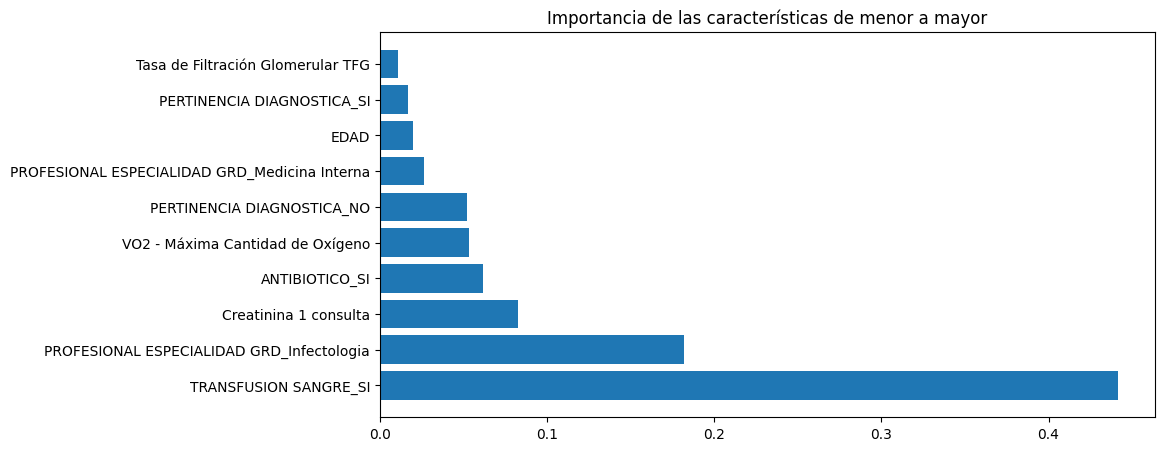

In [527]:
# Grafico 10 características más importantes de menor a mayor
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title("Importancia de las características de menor a mayor")

importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1][:10]
plt.barh(X_train.columns[indices], importances[indices])
plt.show()